<a href="https://colab.research.google.com/github/manjushatr/IBMHRAnalytics/blob/main/DSMiniProjEmployeeAttritionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IBM HR Analytics - Employee Attrition Analysis - EDA and Predictive Analysis through ML Models**

**Done by Manjusha Thottiparambil Ravindran - a22manth**

In [ ]:
#importing libraries

#General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# for now, ignore warnings
import warnings
warnings.simplefilter("ignore", UserWarning)
#import the_module_that_warns

In [ ]:

#Feature Engineering
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Model Selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Model Scores
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

#Feature Importance
from sklearn.inspection import permutation_importance


In [ ]:
#loading the data file from local drive (loan_train.csv)
from google.colab import files
uploaded= files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition (1).csv


In [ ]:
#loading the data to pandas data frane using read_csv method

import io
emp_df = pd.read_csv(io.BytesIO(uploaded['HR-Employee-Attrition.csv']))

## **EDA - Exploratory Data Analysis of the Dataset**

In [ ]:
#viewing the first five records of the dataset
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#checking shape of data
emp_df.shape

(1470, 35)

In [ ]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset consists of numerical and categorical data. The size is 1470 rows with 35 columns

In [ ]:
#checking null values
emp_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataset

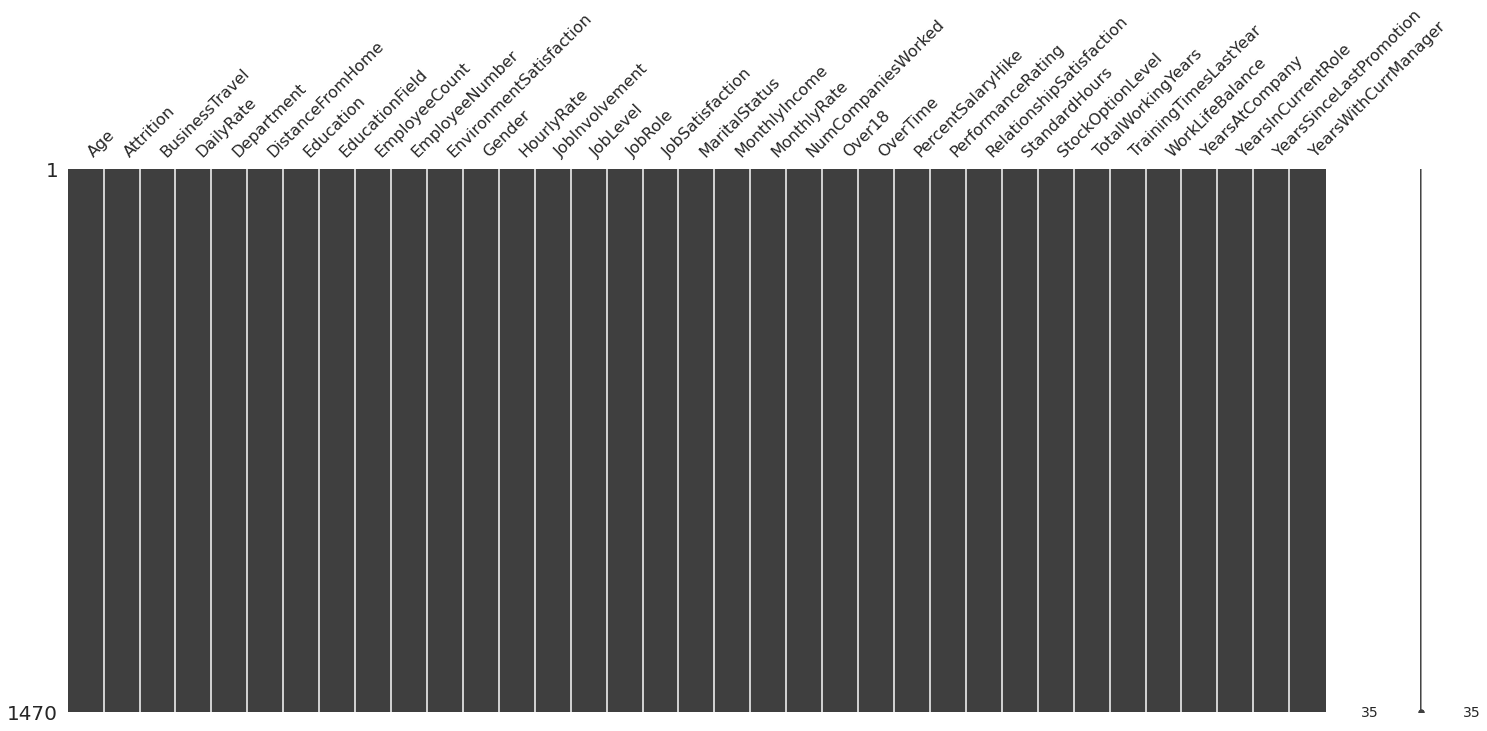

<Figure size 1080x648 with 0 Axes>

In [ ]:
#checking for missing values in the dataset
#Finding missing data info through nullity matrix
import missingno as msno
msno.matrix(emp_df)
plt.figure(figsize = (15,9))
plt.show()

It is visible from the nullity matrix that there are no missing values in the dataset

In [ ]:
#Displaying the categorical features
emp_df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
#checking unique values
emp_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
#All categorical columns
cat_cols = emp_df.select_dtypes('object').columns
cat_cols

for cat in cat_cols:
    print(cat ,'-> ' , emp_df[cat].unique())
    print()

Attrition ->  ['Yes' 'No']

BusinessTravel ->  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department ->  ['Sales' 'Research & Development' 'Human Resources']

EducationField ->  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender ->  ['Female' 'Male']

JobRole ->  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus ->  ['Single' 'Married' 'Divorced']

Over18 ->  ['Y']

OverTime ->  ['Yes' 'No']



Now we got the unique values of all categorical variables

In [ ]:
emp_df.describe().T



,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


There are no outliers as the values in continous variables are gradually increasing

# **Data Insights - Viewing and Analysing Data**


*   	Basic Info: Age, Gender, Education, Education Field, Martial Status, Distance From Home
*   Work Info: Department, Job Role, Job Level, Over Time, Business Travel, Performance Rating, Stock Option Level, Job Involvement


*   Satisfaction:Work-Life Balance, Job Satisfaction, Relationship Satisfaction, Enviroment Satisfaction
*   Salary Related:Monthly Income, Monthly Rate, Daily Rate, Hourly Rate, Percent Salary Hike

*   Time Related:Total Working Years, Traning Time Last Year, Years At Company, Years In Current Role, Years Since Last Promotion, Years With Current Manager, Num Companies Worked


In [ ]:
#backing up the master data to dsmaster
dsmaster=emp_df

In [ ]:
#Counting the attrition values
emp_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

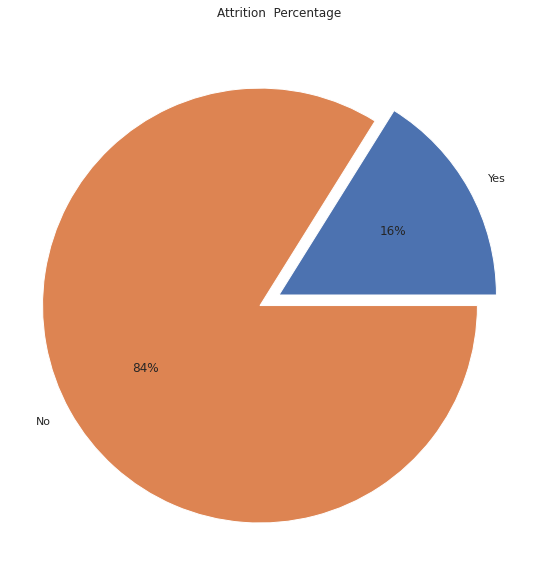

In [ ]:
#Plotting the attrition
vals = [emp_df.Attrition[emp_df.Attrition=='Yes'].count() , emp_df.Attrition[emp_df.Attrition=='No'].count()]
label = ["Yes" , "No"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0 , 0.1));
plt.title("Attrition  Percentage");


Here we can see that the data contains 2 classes. They are Yes and No , So here the there only 16% yes Records and 84% No records. There is an imbalance between both the class.

This is an imbalanced dataset

# Feature Selection

In [ ]:

nousefeatures = []
for col in emp_df.columns:
    if(len(emp_df[col].unique()) == 1):
        nousefeatures.append(col)


nousefeatures


['EmployeeCount', 'Over18', 'StandardHours']

The features EmployeeCount, over18, Standardhours have only 1 unique value. The feature EmployeeNumber have 1470 count which is equal to the number of records. Hence these features are not useful in correlations and model building. Hence they can be dropped from the dataset

In [ ]:
emp_df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
#Handling Target Variable Attrition which is categorical
emp_df['Attrition'].replace({'Yes':1 ,'No':0} ,inplace = True)
emp_df['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [ ]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#Analysing the correlation between the variables
emp_df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


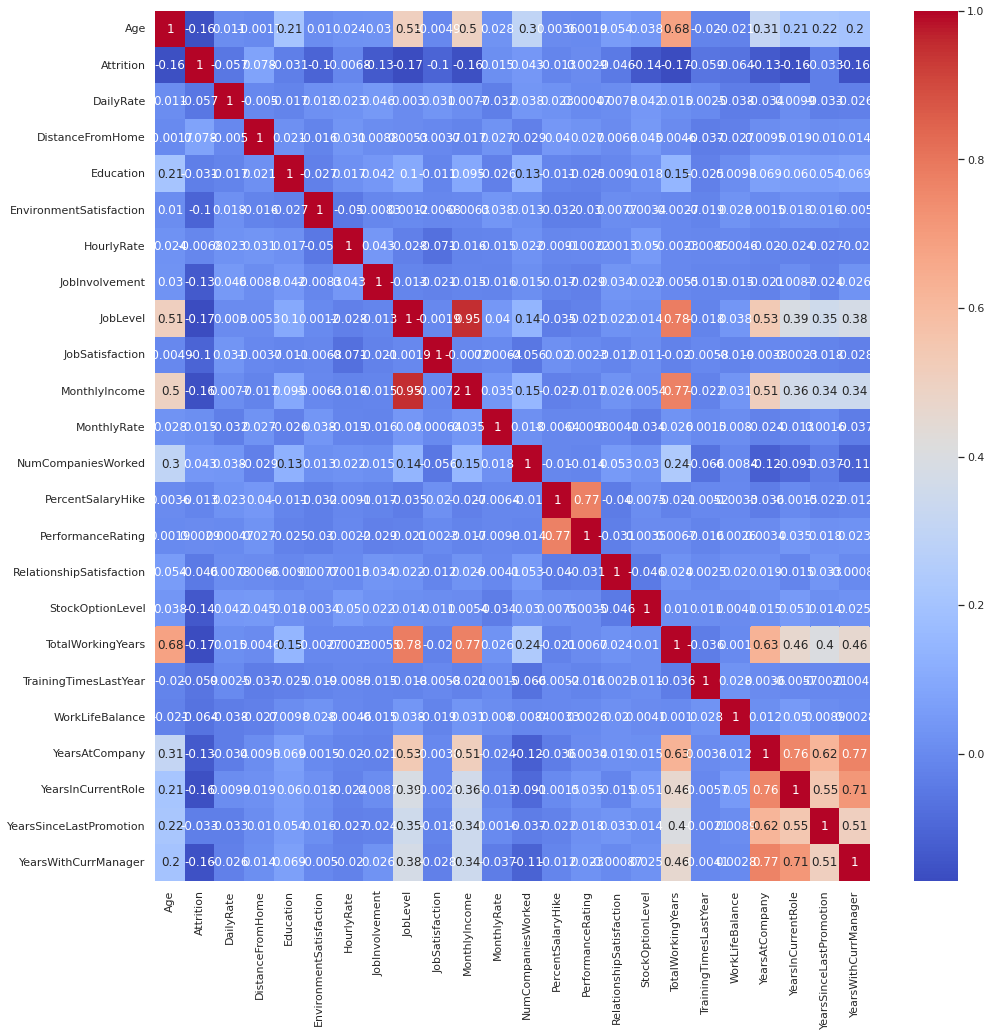

In [ ]:
#Visualization of correlation
#Correlation Heatmap
plt.figure(figsize = (16 ,16))
sb.heatmap(emp_df.corr() ,cmap = 'coolwarm' , cbar = True , annot = True)

Highly Correlated Variables
Years at Company and Years with CurrManager, Years In CurrentRole
Joblevel and Total Working Years, Monthly Income
Performance Rating and Percent SalaryHike
Age and TotalWorking Years slight correlation

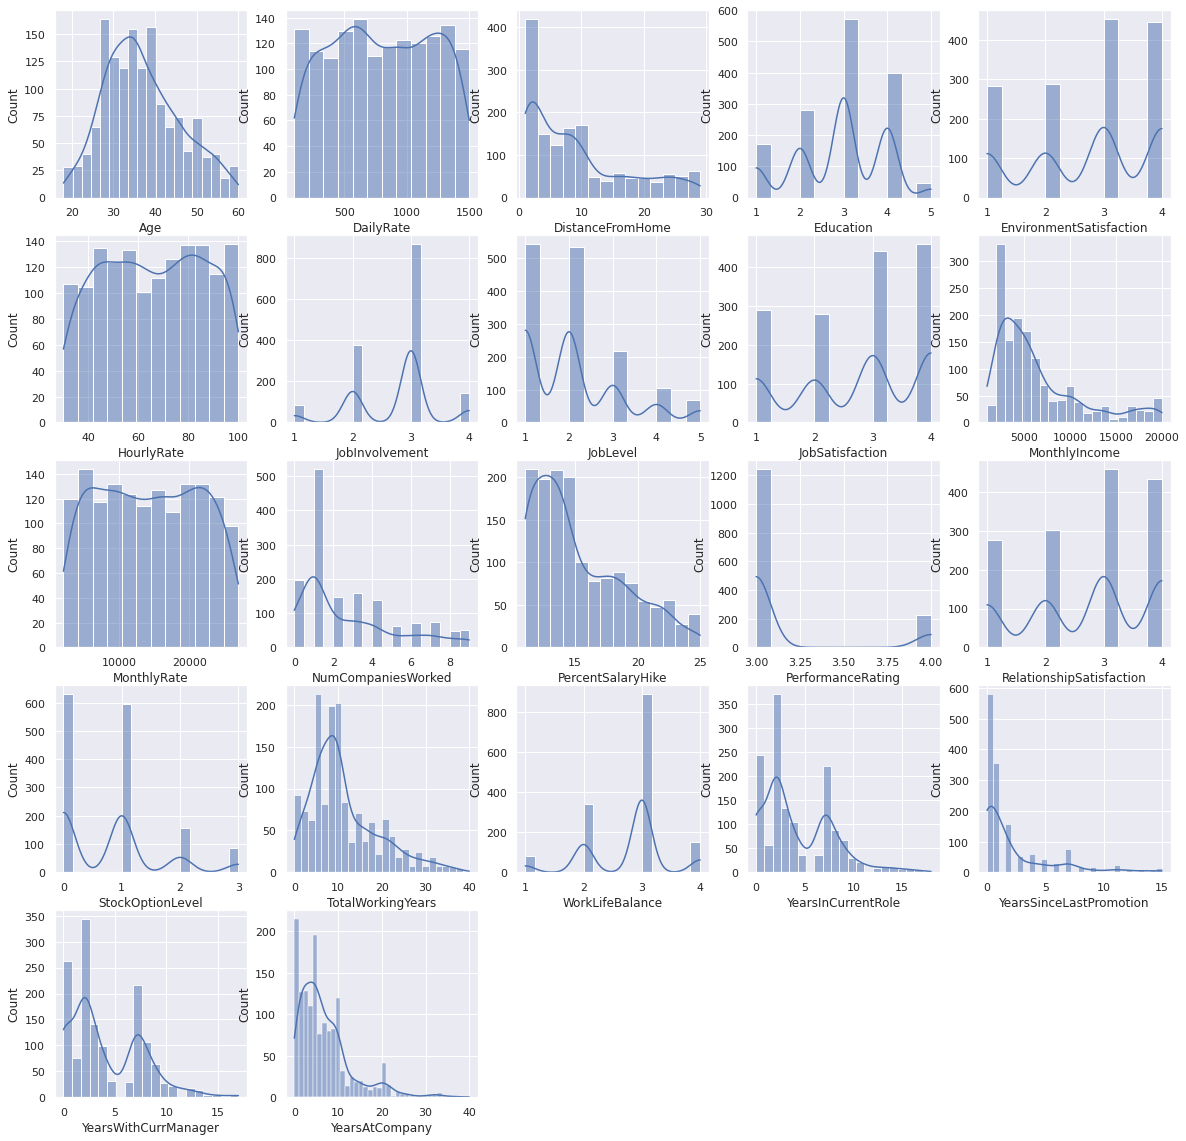

In [ ]:
#Distribution of variables
col = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction',
       'MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
       'TotalWorkingYears','WorkLifeBalance','YearsInCurrentRole' ,'YearsSinceLastPromotion' ,'YearsWithCurrManager' ,'YearsAtCompany']
plt.figure(figsize = (20 ,20))

for i,c in enumerate(col):
    plt.subplot(5 ,5,i+1)
    sb.histplot(data=emp_df, x=c, kde=True)




## **Basic Info and Attrition Analysis**


## **Age Distribution and Attrition**

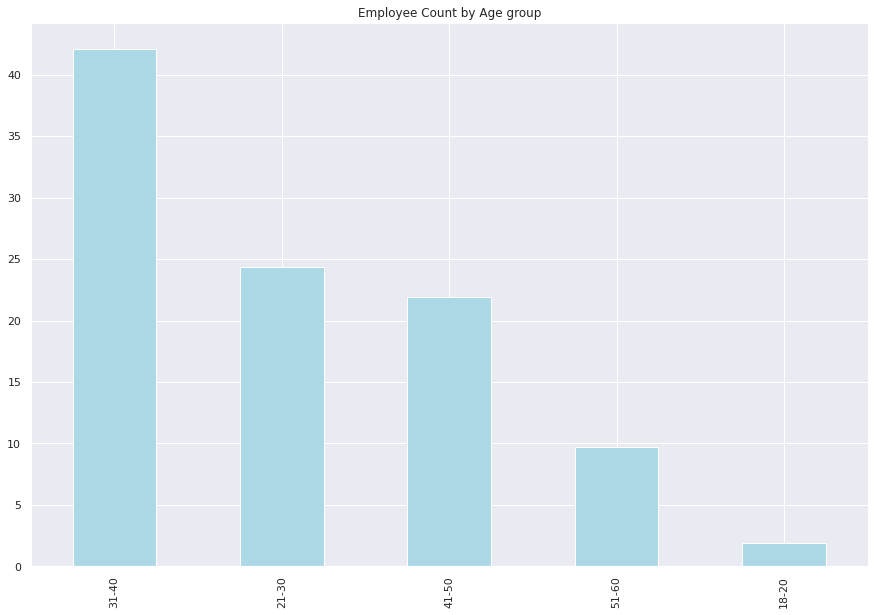

In [ ]:
#Age distribution of the employees
#Binning numerical data : Age
#EmployeedataByAge Range
#Bin the continuous values into discrete intervals.
#min age is 18 and max age is 60 in the dataset

age_labels = ['18-20', '21-30', '31-40', '41-50', '51-60']
#use pandas cut to bin the continuous variable age
emp_df['age_group'] = pd.cut(emp_df.Age, range(10, 61, 10), labels=age_labels)

#Number of Employees by age range
emp_df.age_group.value_counts(normalize=True).mul(100).plot(kind = "bar", color = 'lightblue');
plt.title("Employee Count by Age group");

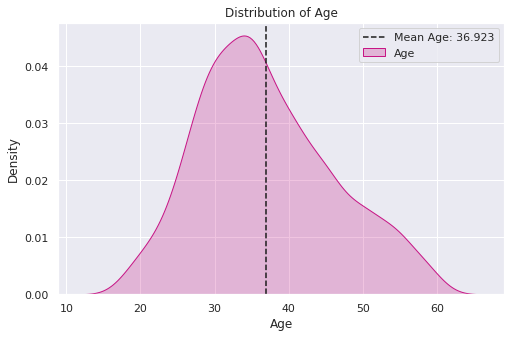

In [ ]:
plt.figure(figsize=(8,5))
sb.kdeplot(x=emp_df['Age'],color='MediumVioletRed',shade=True,label='Age')
plt.axvline(x=emp_df['Age'].mean(),color='k',linestyle ="--",label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

Majority employees have age between 25 and 50

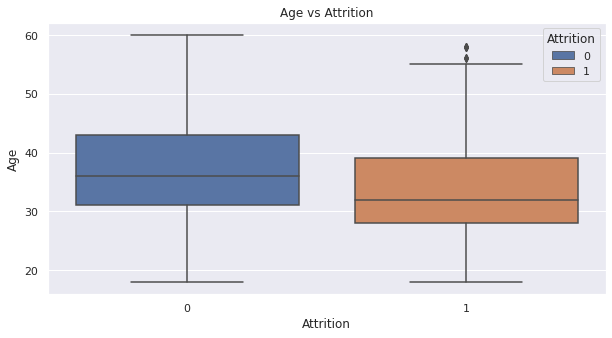

In [ ]:
#Age and Attrition
#ploting Age vs Attrition
plt.figure(figsize=(10,5))
sb.boxplot(y='Age' , x='Attrition' , hue="Attrition",data=emp_df, dodge=False )
plt.title("Age vs Attrition");

Employees who are younger have left the company. Between 25 and 35.

## **Gender Distribution and Attrition**

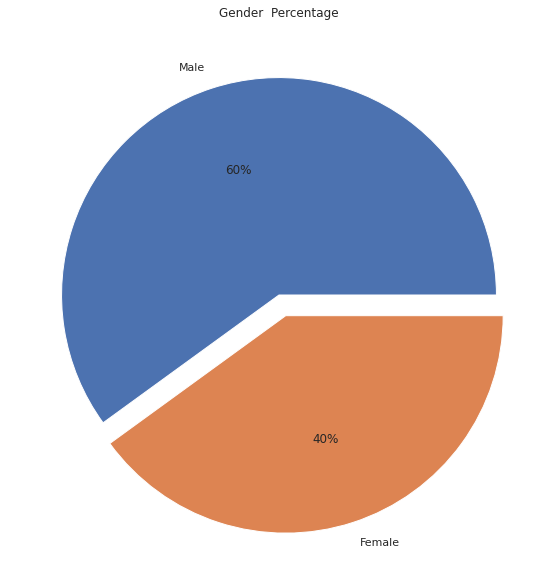

In [ ]:
#Gender Overview
vals = [emp_df.Gender[emp_df.Gender=='Male'].count() , emp_df.Gender[emp_df.Gender=='Female'].count()]
label = ["Male" , "Female"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0 , 0.1));
plt.title("Gender  Percentage");


In [ ]:
#Attrition count by Gender
emp_df.groupby(['Gender','Attrition'])['Attrition'].count() #.unstack()

Gender  Attrition
Female  0            501
        1             87
Male    0            732
        1            150
Name: Attrition, dtype: int64

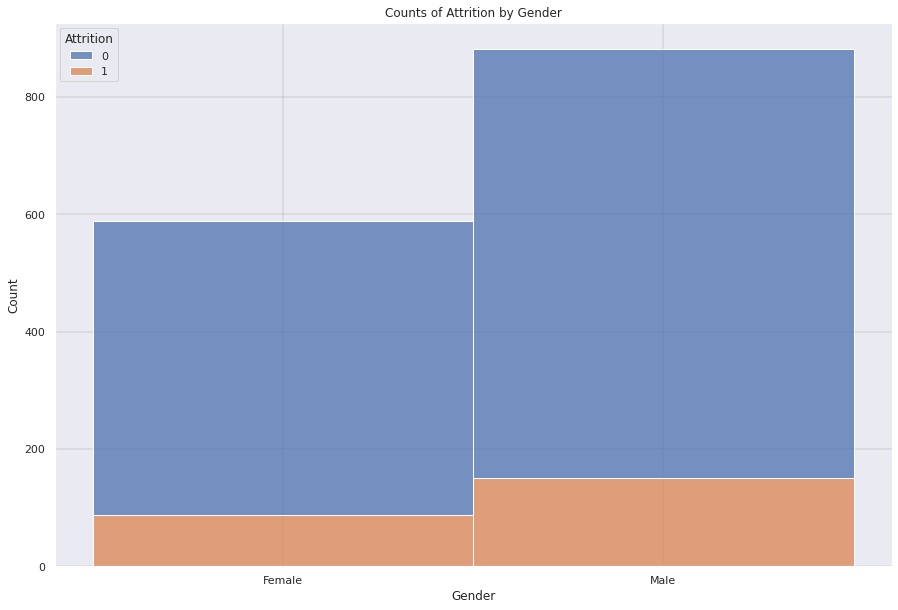

In [ ]:
#Attrition count by Gender - visualization

sb.histplot(data=emp_df, x="Gender", hue="Attrition", multiple="stack")
plt.title("Counts of Attrition by Gender")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")


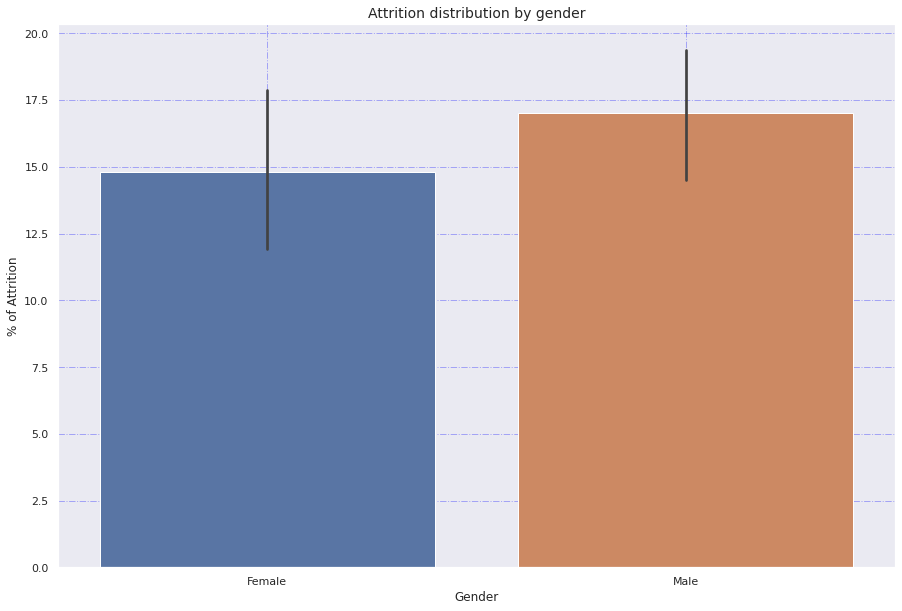

In [ ]:
#Gender wise attrition in percentage
sb.barplot(data=emp_df, x="Gender", y="Attrition",dodge=False, estimator=lambda x: sum(x==1)*100.0/len(x))

plt.title("Attrition distribution by gender", fontsize=14) # set the title
plt.ylabel('% of Attrition') # set the y label
plt.xlabel('Gender') # set the x label
plt.grid(color = "blue", linewidth = "1", linestyle = "-.", alpha=0.3)

More Males have left the organisation compared to females. Male employees (17%) are more likely to leave the organisation than female employees(14%) -

## **Education and Attrition**

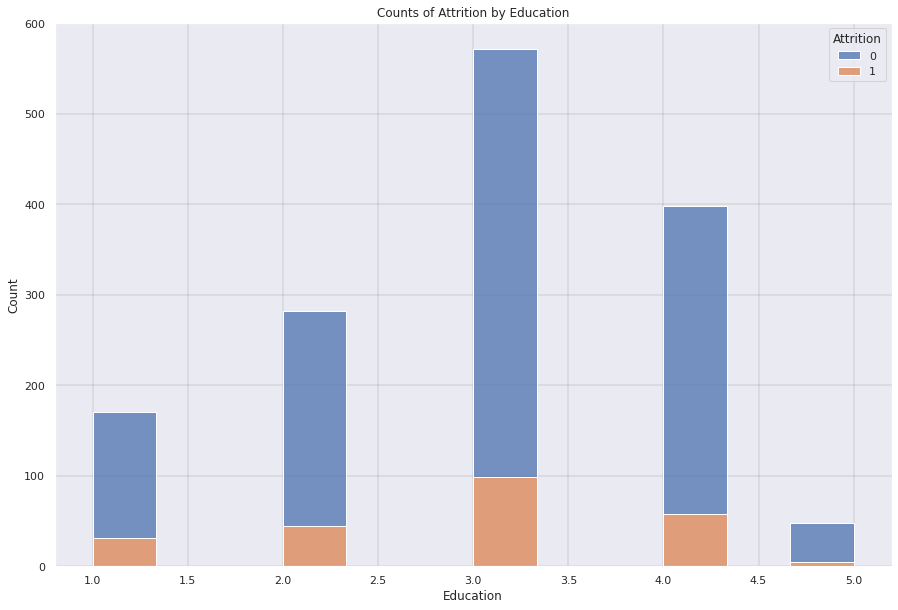

In [ ]:
#Attrition count by Education

sb.histplot(data=emp_df, x="Education", hue="Attrition", multiple="stack")
plt.title("Counts of Attrition by Education")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

Higher attrition in employees with education level 3

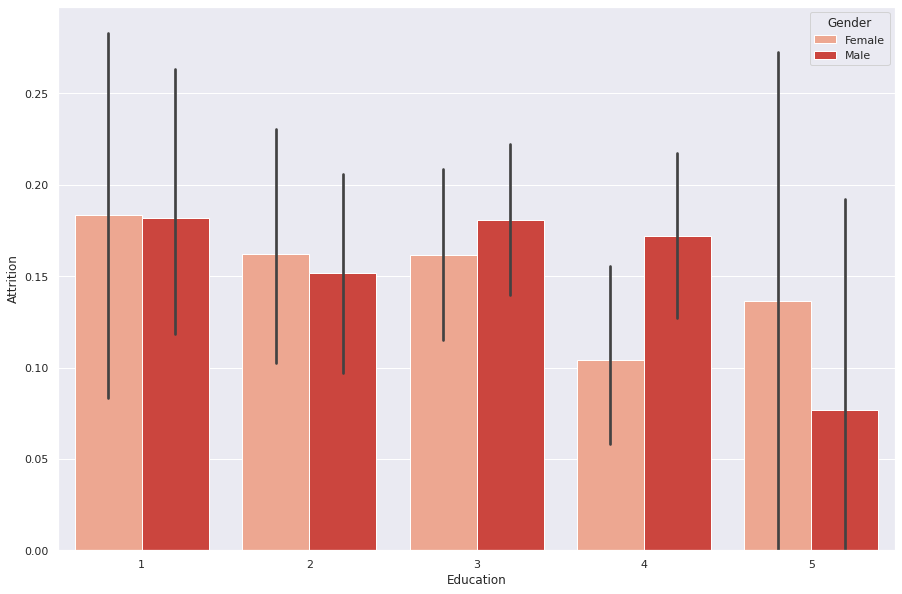

In [ ]:
#Education and Attrition Gender wise
sb.barplot(x = 'Education', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,10)})
# Show the plot
plt.show()

Almost equal attrition rate in males and females in education 1. Education 3 with higher attrition has male employees leaving

## **EducationField and Attrition**

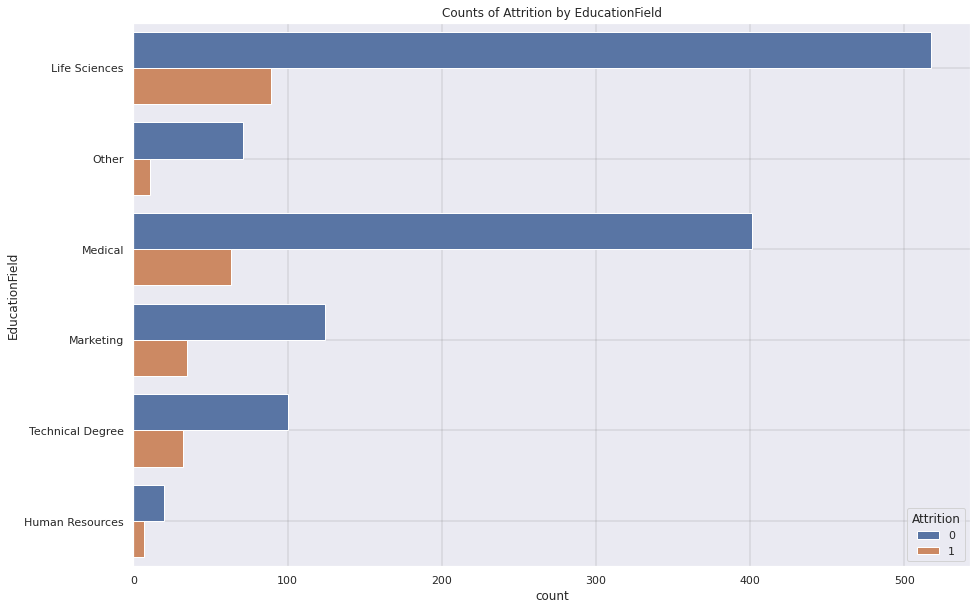

In [ ]:
#Attrition count by EducationField

sb.countplot(data=emp_df, y="EducationField", hue="Attrition")
plt.title("Counts of Attrition by EducationField")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")



Employees studied Life Sciences has mostly left the organisation, but the number of employees with Life Sciences skill is higher

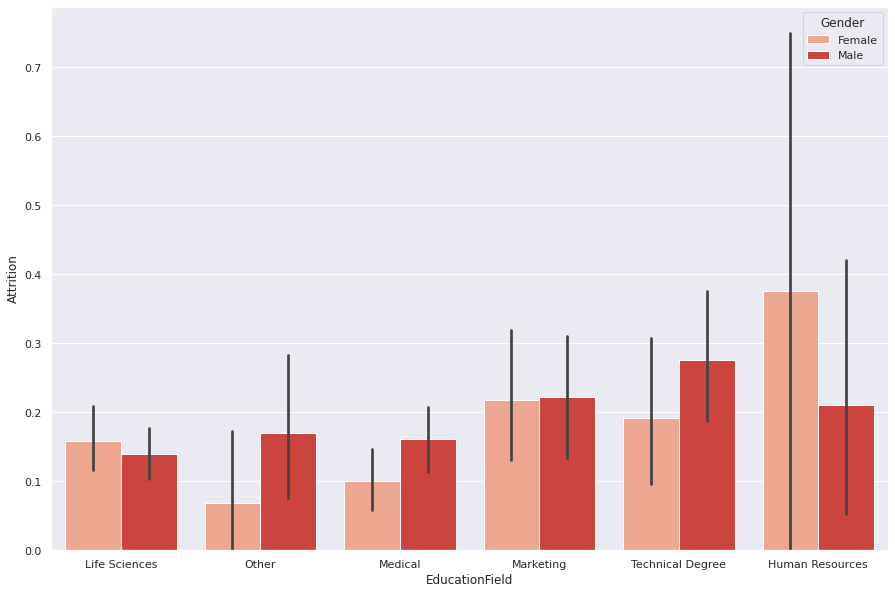

In [ ]:
#Education Field and Attrition
sb.barplot(x = 'EducationField', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,10)})
# Show the plot
plt.show()

Gender wise, the higher attrition in female employees who studied HR.

# **Marital status and Attrition**

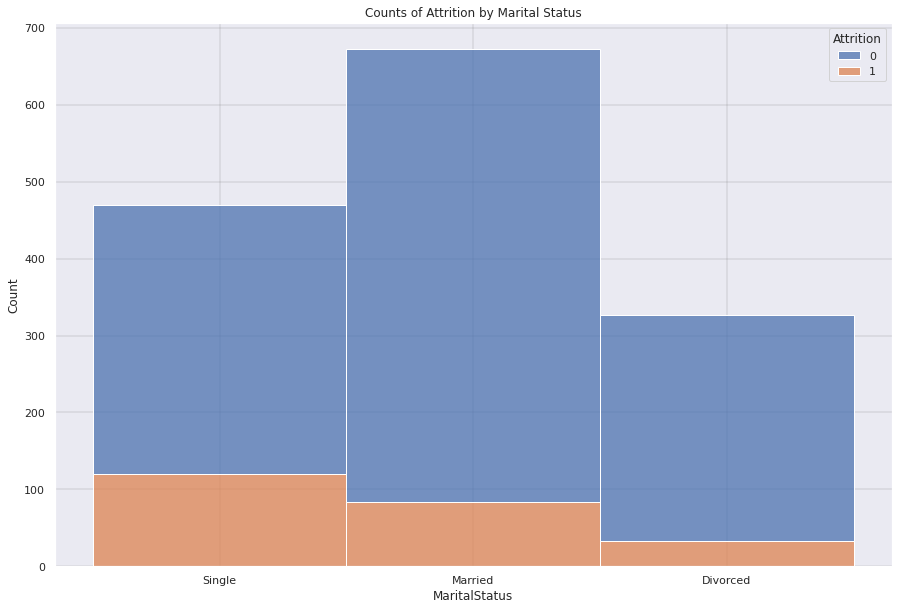

In [ ]:
#Attrition count by Marital Status

sb.histplot(data=emp_df, x="MaritalStatus", hue="Attrition", multiple="stack")
plt.title("Counts of Attrition by Marital Status")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

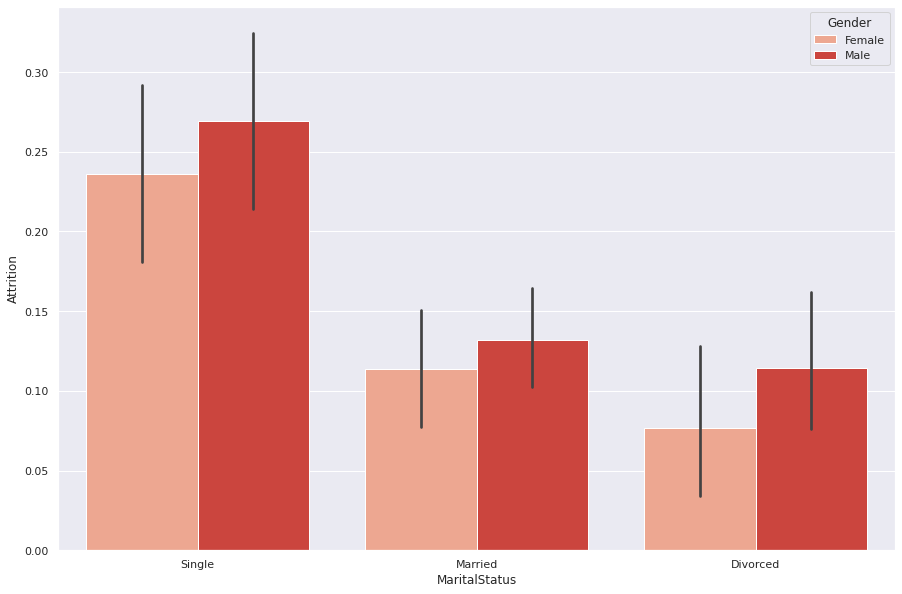

In [ ]:
#Attrition count by Marital Status Genderwise

sb.barplot(x = 'MaritalStatus', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,10)})
# Show the plot
plt.show()

Single male employees had higher attrition

## **Distance from home and Attrition**

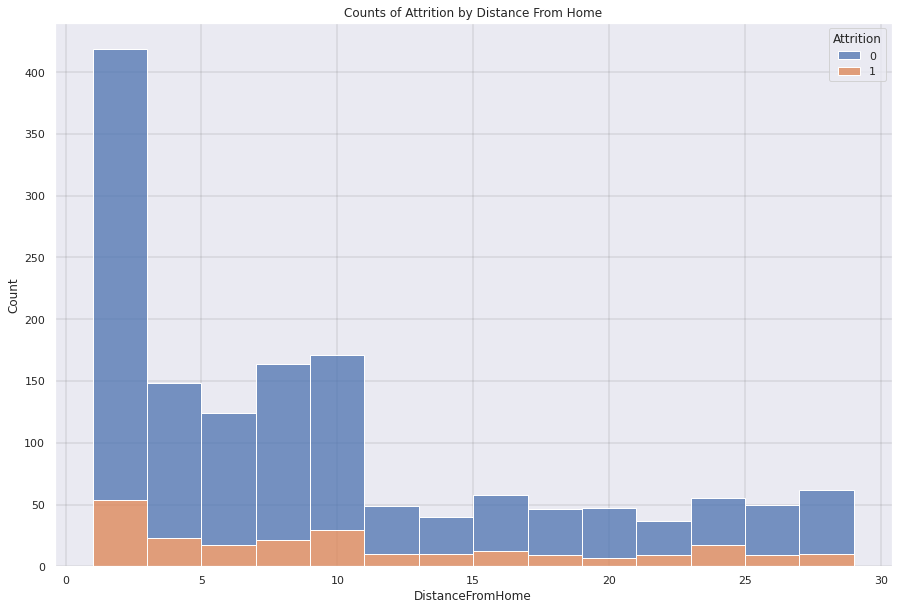

In [ ]:
#Attrition count by Distance from home

sb.histplot(data=emp_df, x="DistanceFromHome", hue="Attrition", multiple="stack")
plt.title("Counts of Attrition by Distance From Home")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

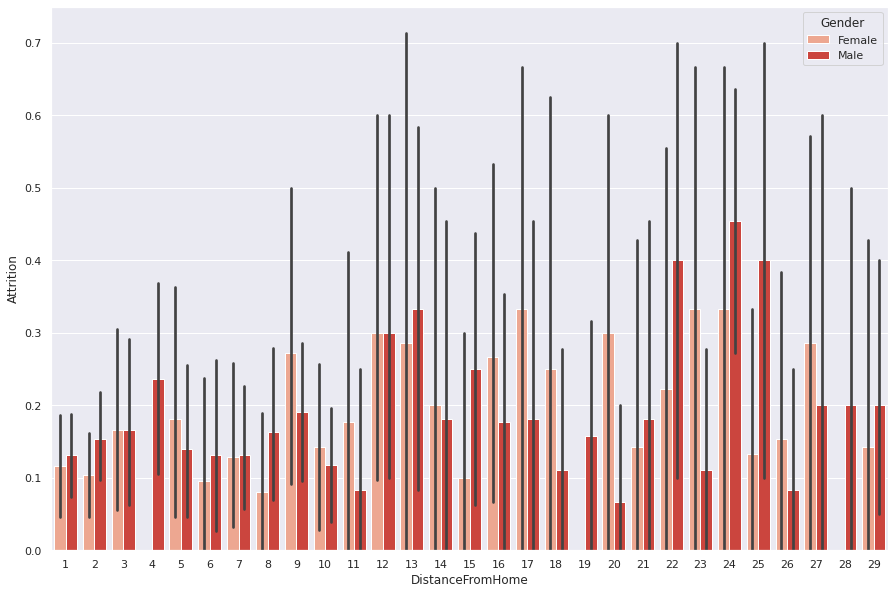

In [ ]:
#Attrition count by DistanceFromHome Genderwise

sb.barplot(x = 'DistanceFromHome', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,10)})
# Show the plot
plt.show()

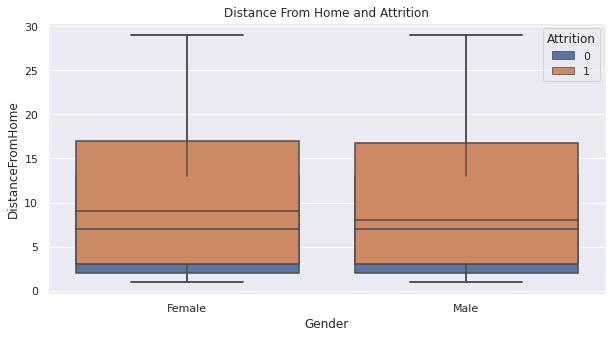

In [ ]:
#Distance From Home  and Attrition Genderwise in boxplot as there are many continous values
#ploting Age vs Attrition
plt.figure(figsize=(10,5))
sb.boxplot(y='DistanceFromHome' , x='Gender' , hue="Attrition",data=emp_df, dodge=False )
plt.title("Distance From Home and Attrition");

Most of the people who leave the company are located more than 11-12 km away from the company

# Job wise Attrition based on Distance From Home

In [ ]:
fig=px.box(emp_df,x='JobRole',y='DistanceFromHome',color='Attrition',template='simple_white')
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Job wise Employee Attrition based on Distance from Home </b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

## **Work Related Analysis**

## **Department and Attrition**

<Figure size 2880x720 with 0 Axes>

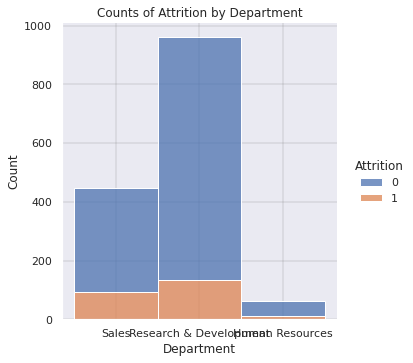

In [ ]:
plt.figure(figsize=(40,10))
sb.displot(data=emp_df, x="Department", hue="Attrition", multiple="stack")
plt.title("Counts of Attrition by Department")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

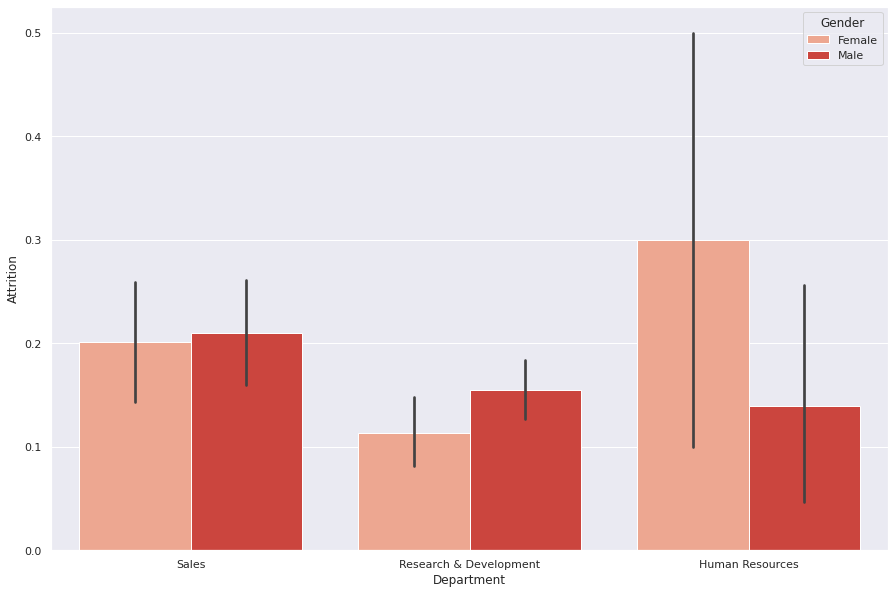

In [ ]:
#Department wise attrition
sb.barplot(x = 'Department', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds")

# Show the plot
plt.show()

# **Business Travel and Attrition**

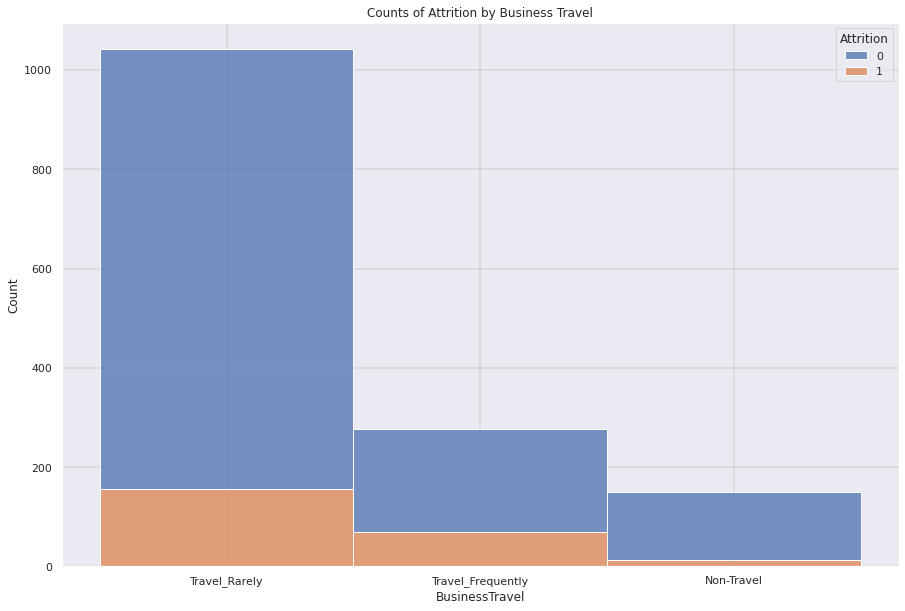

In [ ]:
sb.histplot(data=emp_df, x="BusinessTravel", hue="Attrition", multiple="stack")
plt.title("Counts of Attrition by Business Travel")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

More people who travel rarely do not leave the company

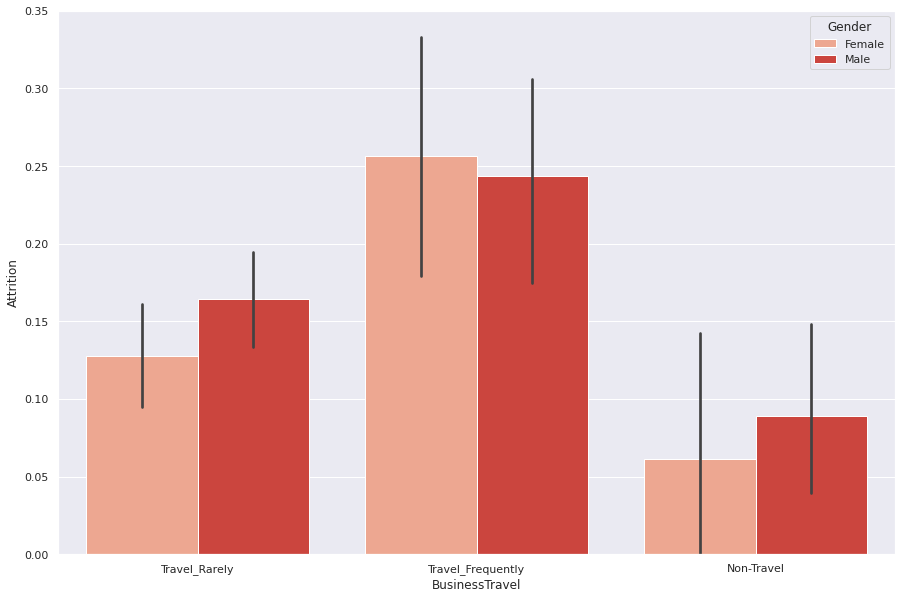

In [ ]:
#Travel and attrition
sb.barplot(x = 'BusinessTravel', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds")

# Show the plot
plt.show()

The female employees who travelled frequently had a tendency to leave the company

# **Job Role and Attrition**

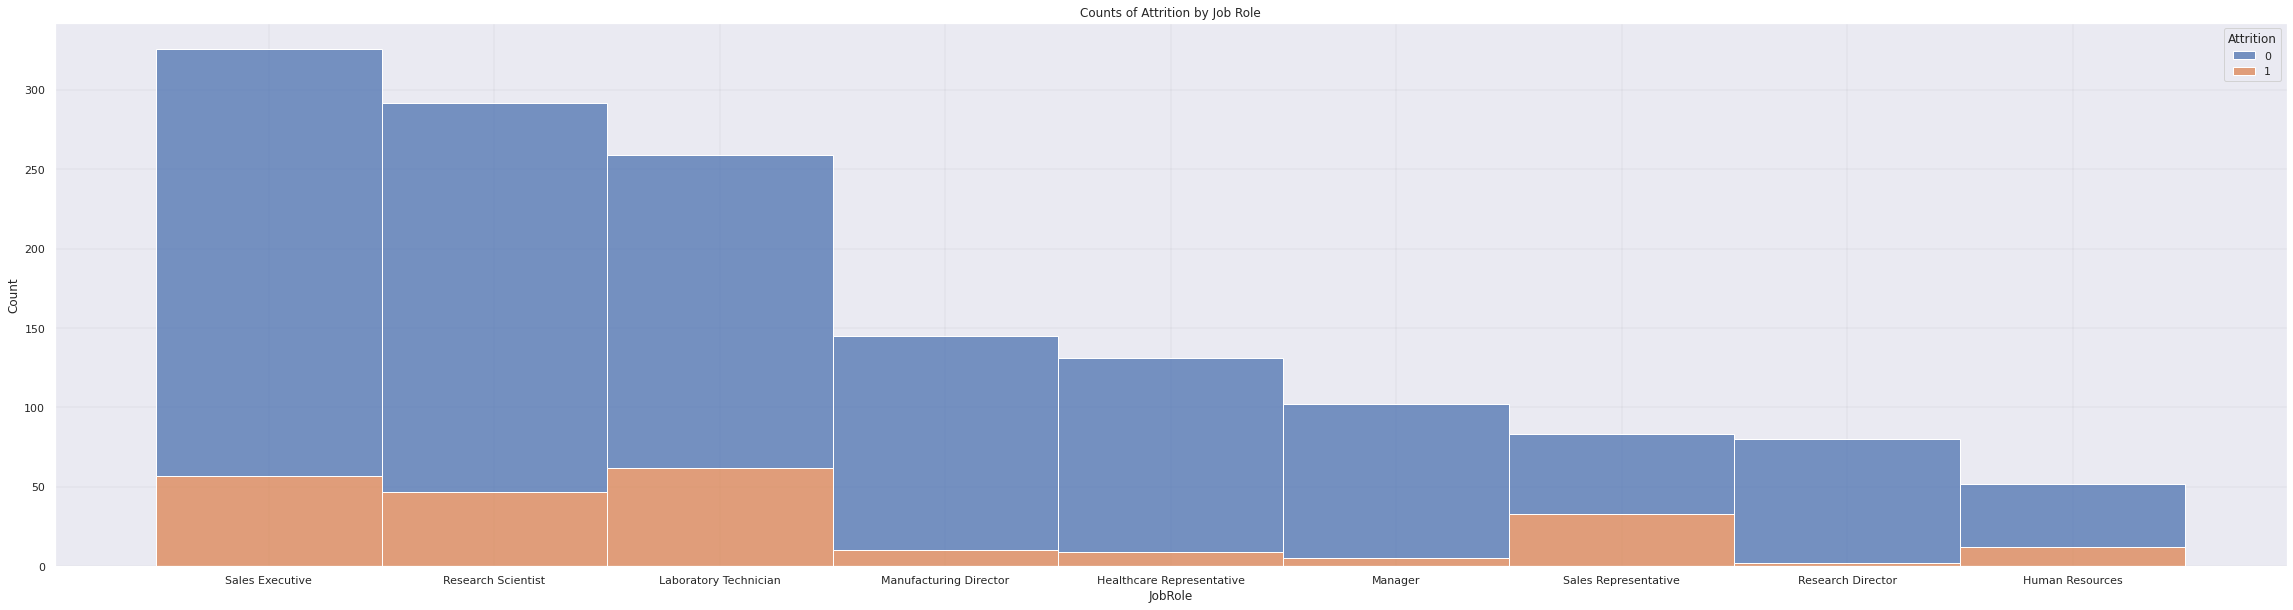

In [ ]:
plt.figure(figsize=(40,10))
sb.histplot(data=emp_df, x="JobRole", hue="Attrition", multiple="stack")
plt.title("Counts of Attrition by Job Role")
plt.grid(color = "grey", linewidth = "0.1", linestyle = "-")

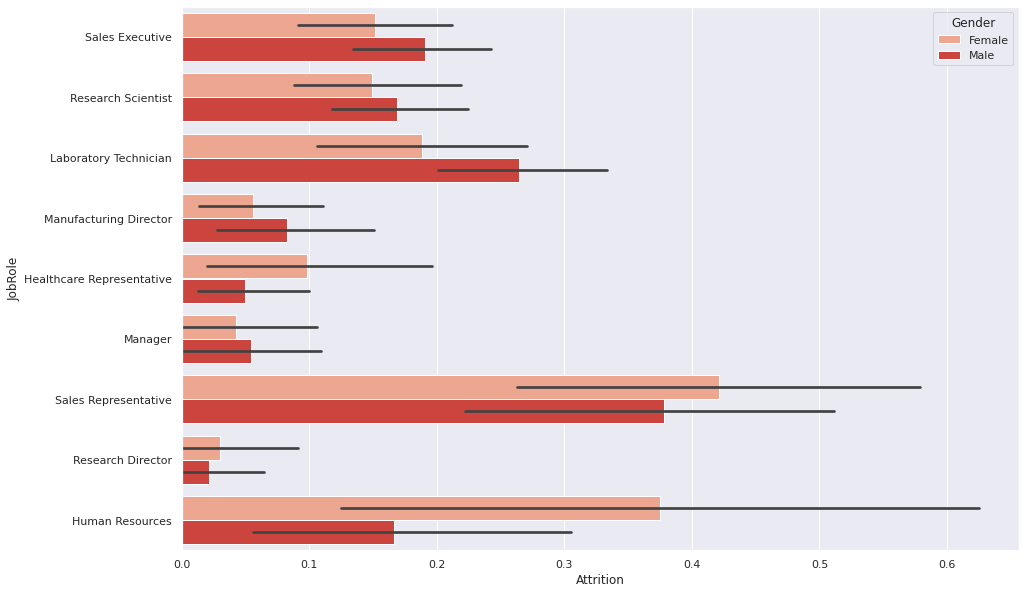

In [ ]:
#JobRole and Attrition Genderwise
sb.barplot(x = 'Attrition', y = 'JobRole', hue = 'Gender', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(30,10)})
# Show the plot
plt.show()

More Female and Male Sales Representatives left the company

# Average age in different Jobroles by Gender

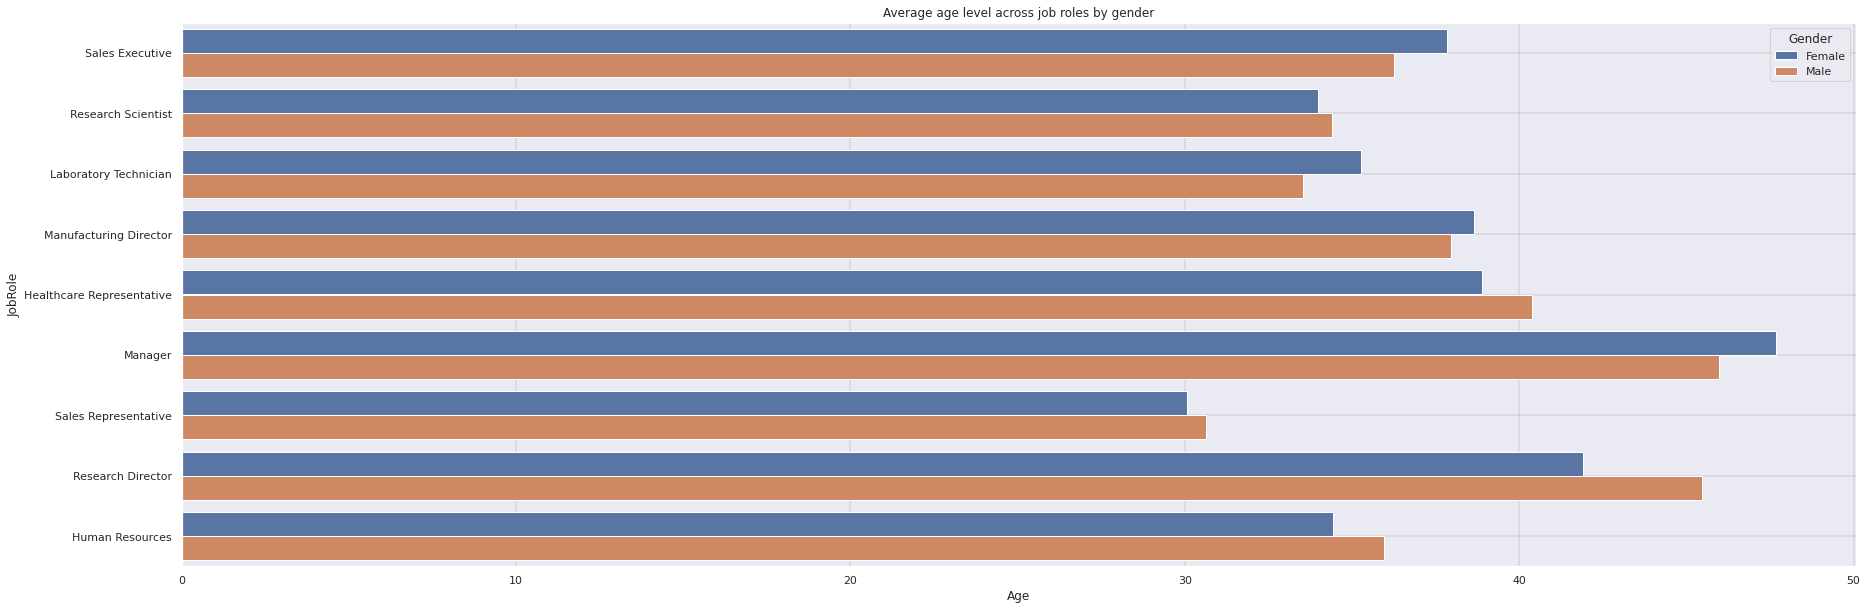

In [ ]:
color = ['red', 'orange', 'blue', 'purple']
bplot = sb.barplot(data=emp_df,
            x="Age",
            y="JobRole",
            hue="Gender",
            ci=None,
            #palette=color # define colors of your selection
            )
sb.set(rc={'figure.figsize':(10,10)})
plt.title("Average age level across job roles by gender")
#plt.ylabel("Fare (pounds)")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")


## **Which education field and job role has seen most attrition?**

In [ ]:
Attr_yes_df=emp_df[emp_df['Attrition']==1]
Attr_no_df=emp_df[emp_df['Attrition']==0]

dept_count_yes=Attr_yes_df['EducationField'].value_counts()
dept_count_no=Attr_no_df['EducationField'].value_counts()
job_role_yes=Attr_yes_df['JobRole'].value_counts()
job_role_no=Attr_no_df['JobRole'].value_counts()

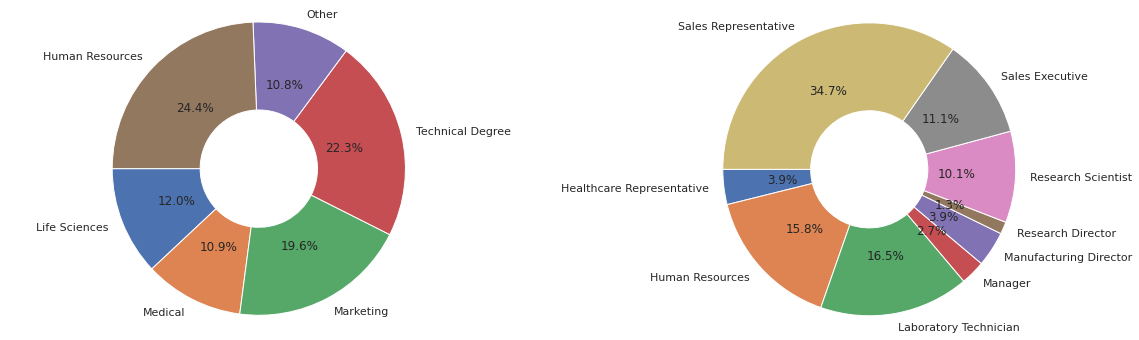

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20, 6))

# Pie wedgeprops with width being the donut thickness
axes[0].pie((dept_count_yes*100/dept_count_no), wedgeprops=dict(width=0.6), labels=(dept_count_yes/dept_count_no).index,autopct='%1.1f%%', startangle=180);
axes[0].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[0].axis('equal')

#plt.show()

axes[1].pie((job_role_yes*100/job_role_no), wedgeprops=dict(width=0.6), labels=(job_role_yes/job_role_no).index,autopct='%1.1f%%', startangle=180);
axes[1].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[1].axis('equal')
plt.show()

# **OverTime and Attrition**

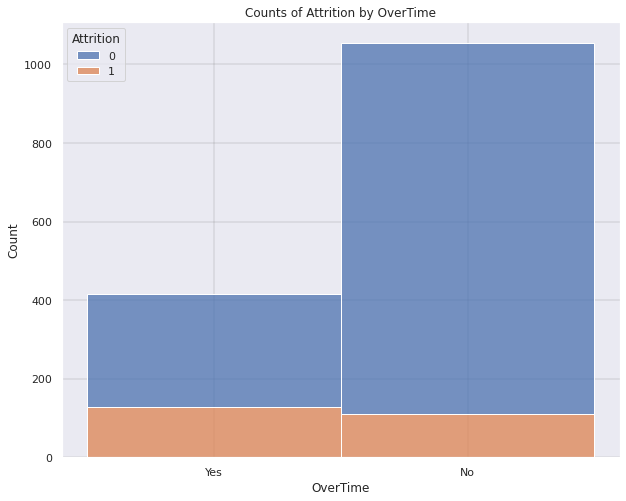

In [ ]:
plt.figure(figsize =(10 ,8))
sb.histplot(data=emp_df, x="OverTime", hue="Attrition", multiple="stack")
plt.title("Counts of Attrition by OverTime")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

**OverTime and Attrition Genderwise**

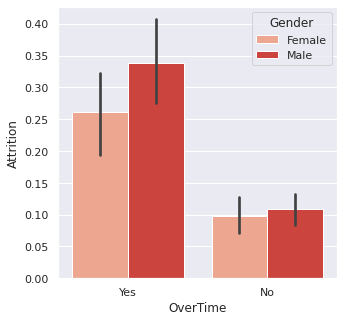

In [ ]:
#OverTime and Attrition Genderwise
plt.figure(figsize =(5 ,5))
sb.barplot(x = 'OverTime', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

Employees who did overtime left the company and more was male employees

## **Job Level and Attrition**

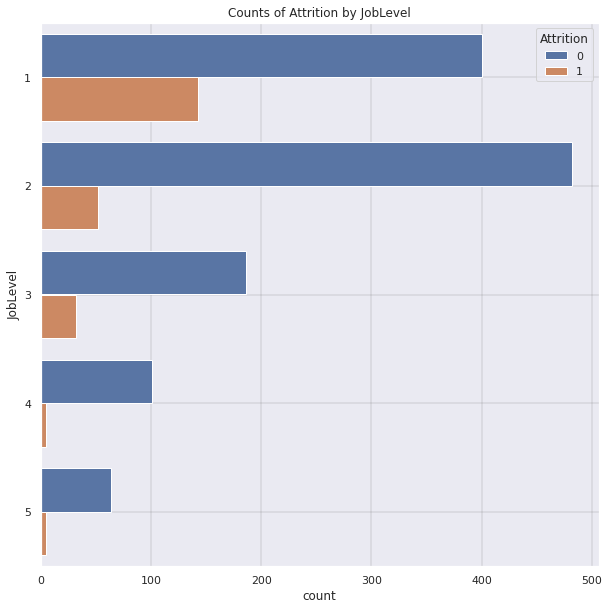

In [ ]:
plt.figure(figsize =(10 ,10))
sb.countplot(data=emp_df, y="JobLevel", hue="Attrition")
plt.title("Counts of Attrition by JobLevel")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

**Joblevel and Attrition Genderwise**

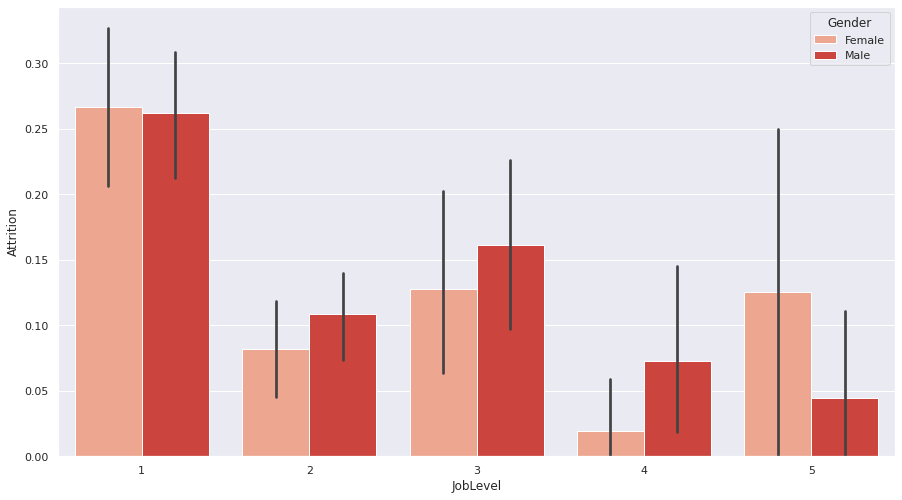

In [ ]:
#JobLevel and Attrition Genderwise
sb.barplot(x = 'JobLevel', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

More Attrition has occured in JobLevel 1 in both male and female employees

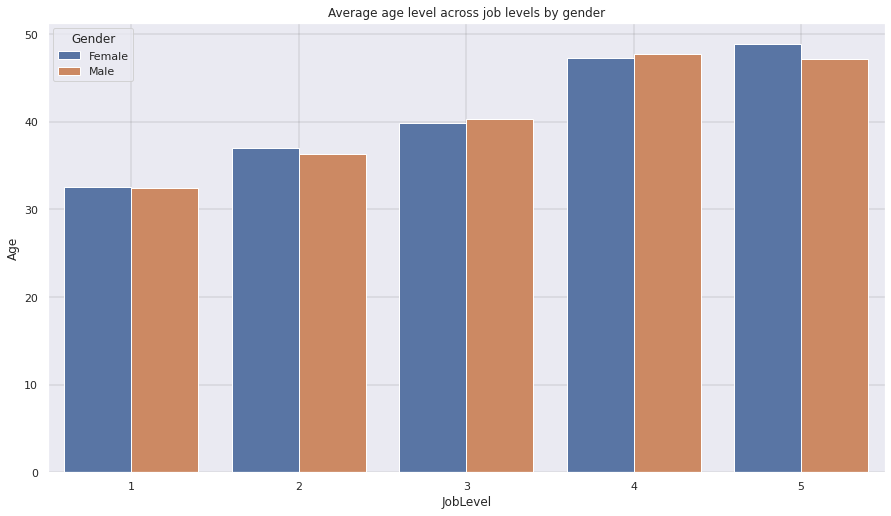

In [ ]:
color = ['red', 'orange', 'blue', 'purple']
bplot = sb.barplot(data=emp_df,
            x="JobLevel",
            y="Age",
            hue="Gender",
            ci=None,
            #palette=color # define colors of your selection
            )
sb.set(rc={'figure.figsize':(25,15)})
plt.title("Average age level across job levels by gender")
#plt.ylabel("Fare (pounds)")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

# **Performance Rating and Attrition**

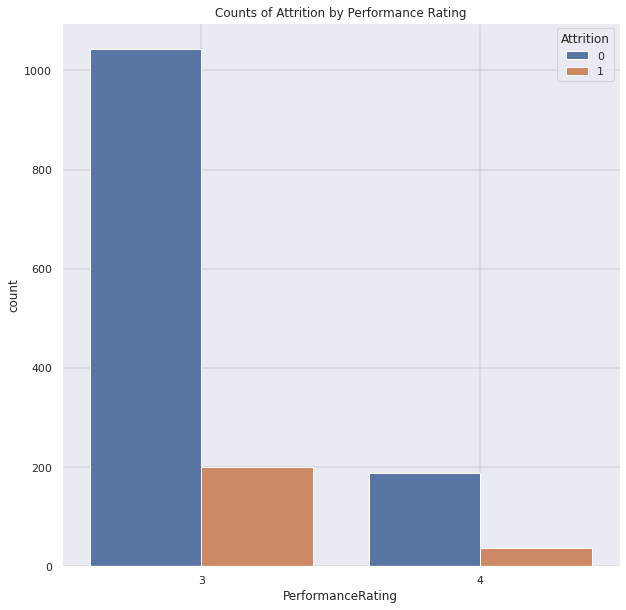

In [ ]:
plt.figure(figsize =(10 ,10))
sb.countplot(data=emp_df, x="PerformanceRating", hue="Attrition")
plt.title("Counts of Attrition by Performance Rating")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

Performance Rating and Attrition Genderwise

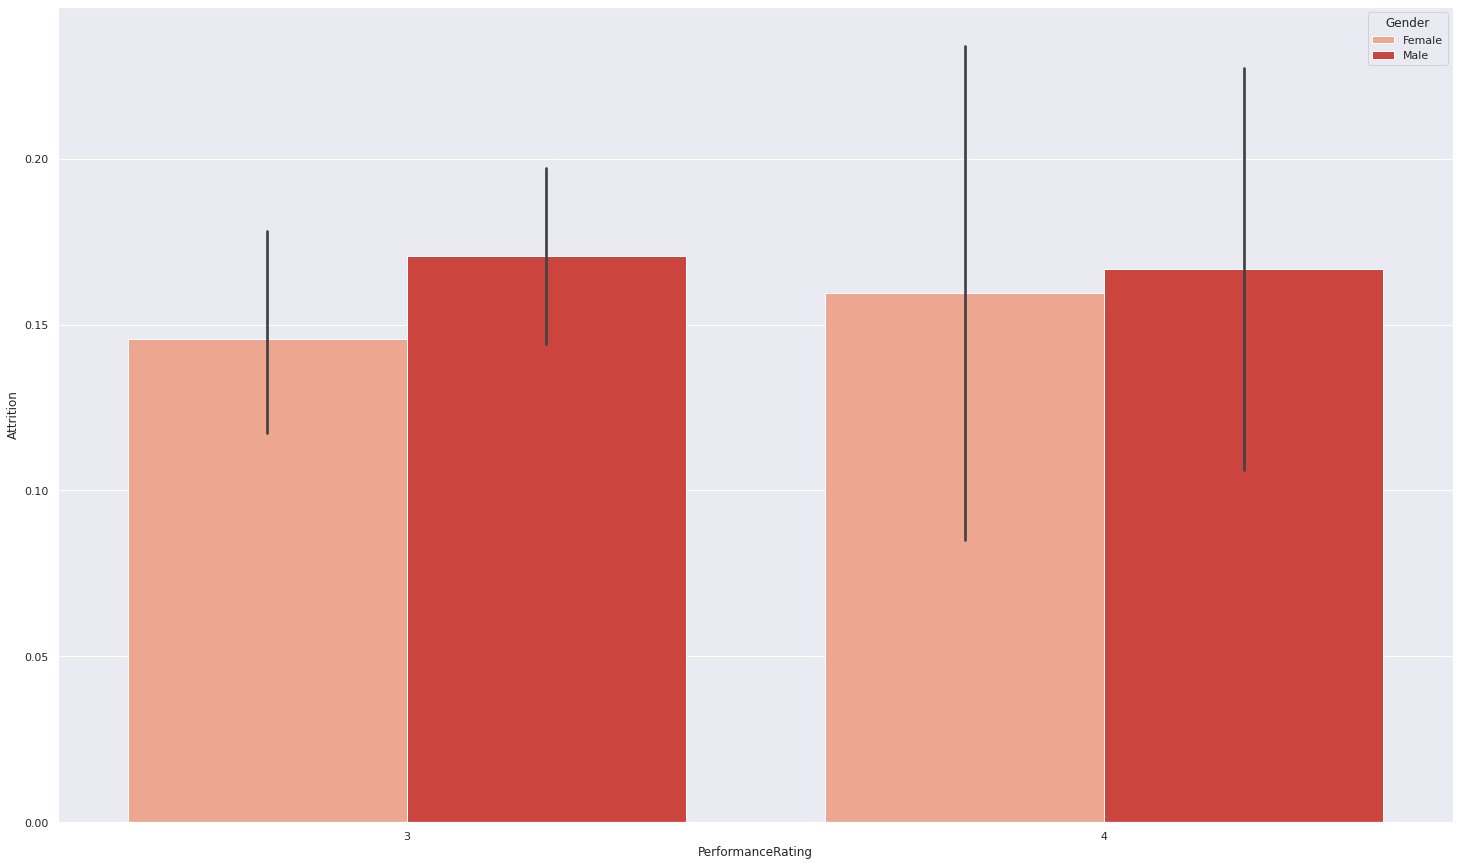

In [ ]:
#Performance Rating and Attrition Genderwise
sb.barplot(x = 'PerformanceRating', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds" )
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

More males with performance rating 3 have left the company.

# **Stock option Level and Attrition**

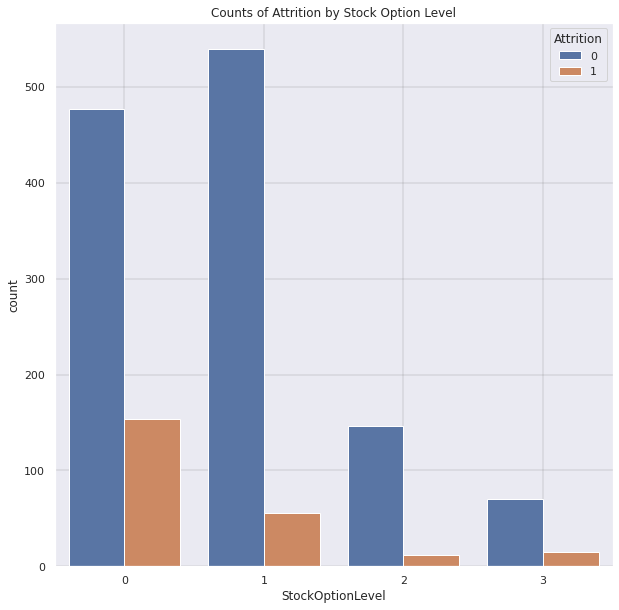

In [ ]:
#Stockoptionlevel and Attrition
plt.figure(figsize =(10 ,10))
sb.countplot(data=emp_df, x="StockOptionLevel", hue="Attrition")
plt.title("Counts of Attrition by Stock Option Level")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

High attrition is in Stock option level 0

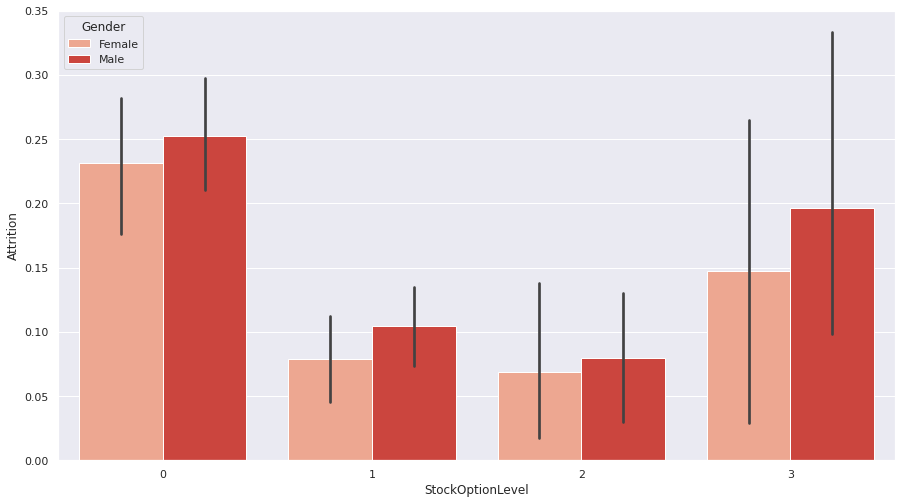

In [ ]:
#Stock Option Level and Attrition Genderwise
sb.barplot(x = 'StockOptionLevel', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds" )
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

Attrition is high in male employees and stock option level 0. Female attrition is also high in this level


# **Job Involvement and Attrition**

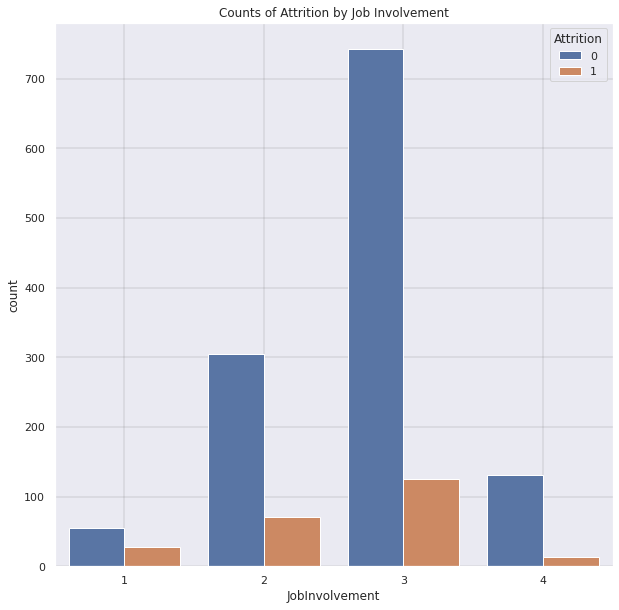

In [ ]:
plt.figure(figsize =(10 ,10))
sb.countplot(data=emp_df, x="JobInvolvement", hue="Attrition")
plt.title("Counts of Attrition by Job Involvement")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

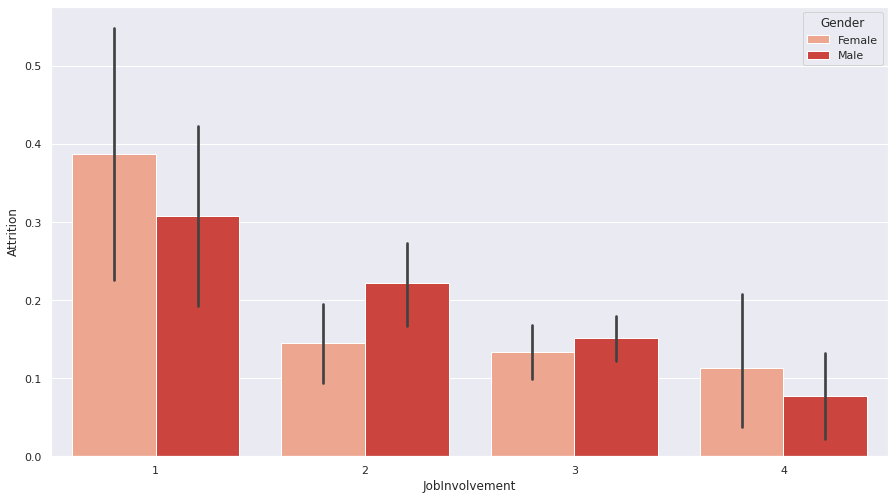

In [ ]:
#Stock Option Level and Attrition Genderwise
sb.barplot(x = 'JobInvolvement', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds" )
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

## **3. Satisfaction Analysis**

## **Attrition based on Job Satisfaction**

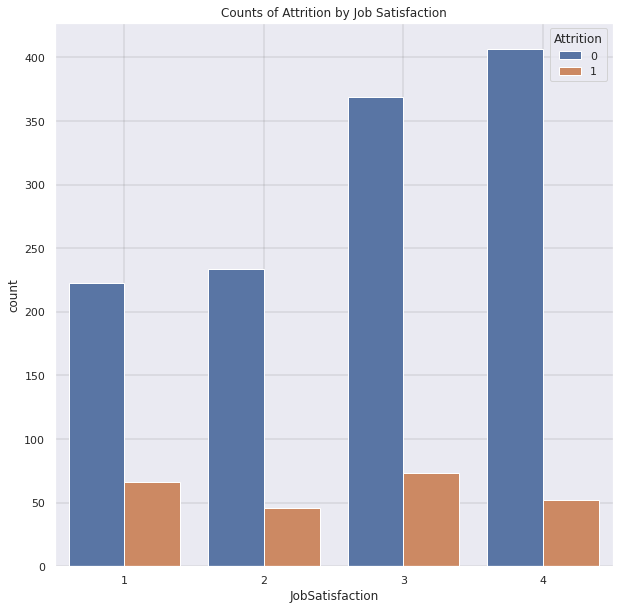

In [ ]:
plt.figure(figsize =(10 ,10))
sb.countplot(data=emp_df, x="JobSatisfaction", hue="Attrition")
plt.title("Counts of Attrition by Job Satisfaction")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

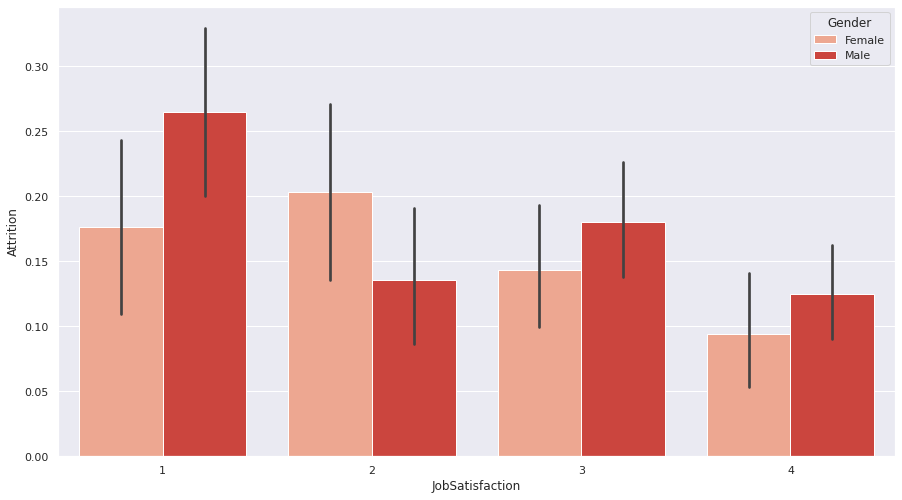

In [ ]:
#Job Satisfaction and Attrition Genderwise
sb.barplot(x = 'JobSatisfaction', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds" )
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

Male employees with Jobsatisfaction 1 have left the company, but females with jobsatisfaction 2 has high attrition

# Relation between Gender and Jobsatisfaction

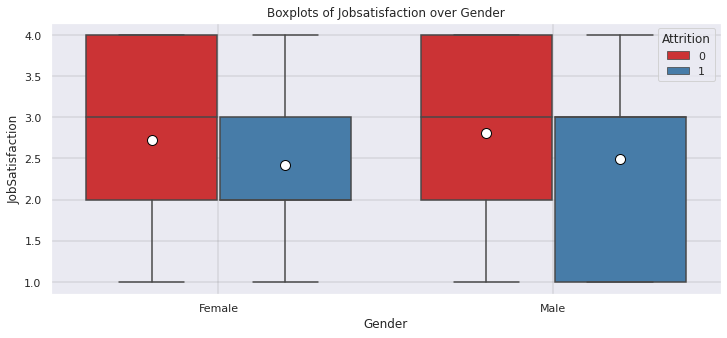

In [ ]:
#define graph size
plt.figure(figsize = (12,5))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

#Draw a boxplot with nested grouping by two categorical variables:
sb.boxplot(x="Gender", y="JobSatisfaction", hue="Attrition", data = emp_df,
           showmeans = True,  #line is the median, not the mean, mean is depicted in white circle
           meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"},
           #palette="Set1"
           )
#place legend in center right of plot
plt.legend(loc='upper right', title='Attrition')
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Boxplots of Jobsatisfaction over Gender");

For Individuals who stayed in the company, jobsatisfaction is same irrespective of Gender, but for employees who left the company, male had job satisfaction between 1 and 3 and female between 2 and 3

# **Work Life Balance and Attrition**

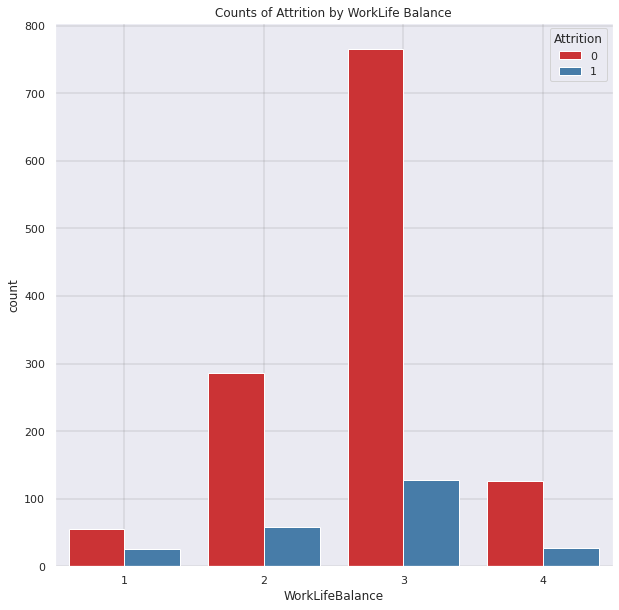

In [ ]:
plt.figure(figsize =(10 ,10))
sb.countplot(data=emp_df, x="WorkLifeBalance", hue="Attrition")
plt.title("Counts of Attrition by WorkLife Balance")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

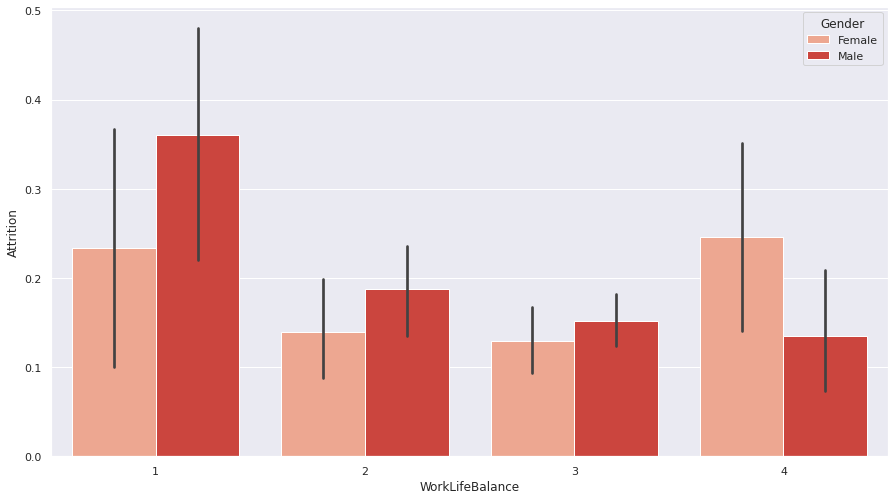

In [ ]:
#Job Satisfaction and Attrition Genderwise
sb.barplot(x = 'WorkLifeBalance', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds" )
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

High male attrition is with 1 and high female attrition is with worklifebalance value 4.

# **Relationship Satisfaction**

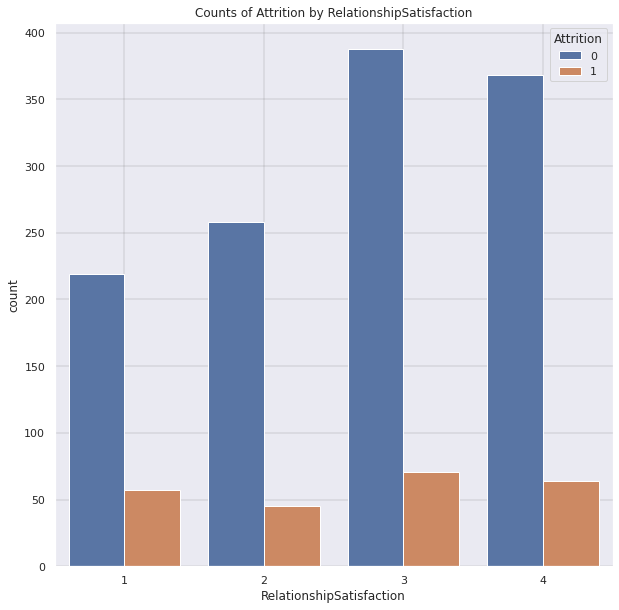

In [ ]:
plt.figure(figsize =(10 ,10))
sb.countplot(data=emp_df, x="RelationshipSatisfaction", hue="Attrition")
plt.title("Counts of Attrition by RelationshipSatisfaction")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

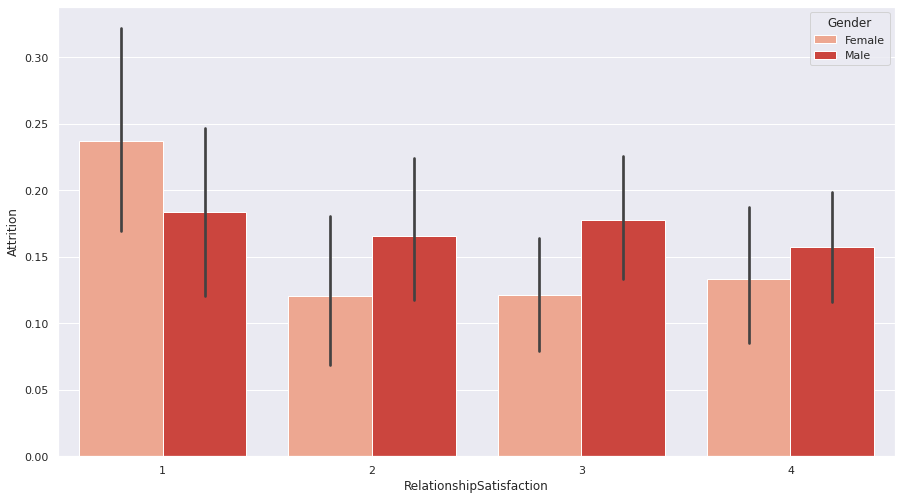

In [ ]:
#Job Satisfaction and Attrition Genderwise
sb.barplot(x = 'RelationshipSatisfaction', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds" )
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

# **Environment Satisfaction**

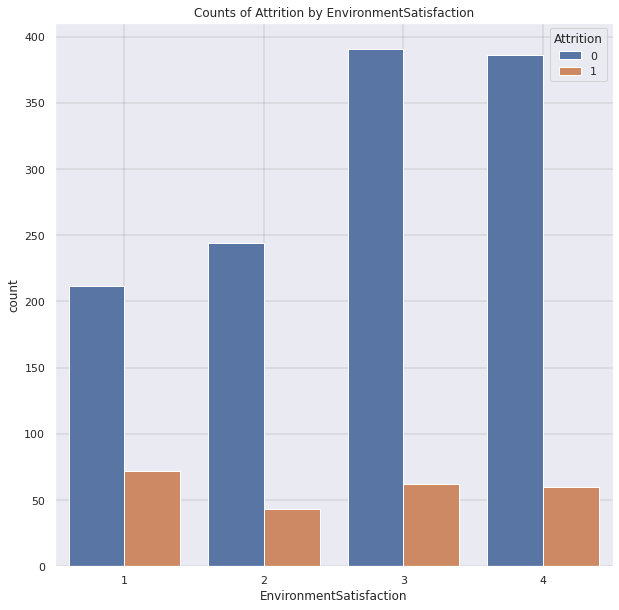

In [ ]:
plt.figure(figsize =(10 ,10))
sb.countplot(data=emp_df, x="EnvironmentSatisfaction", hue="Attrition")
plt.title("Counts of Attrition by EnvironmentSatisfaction")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

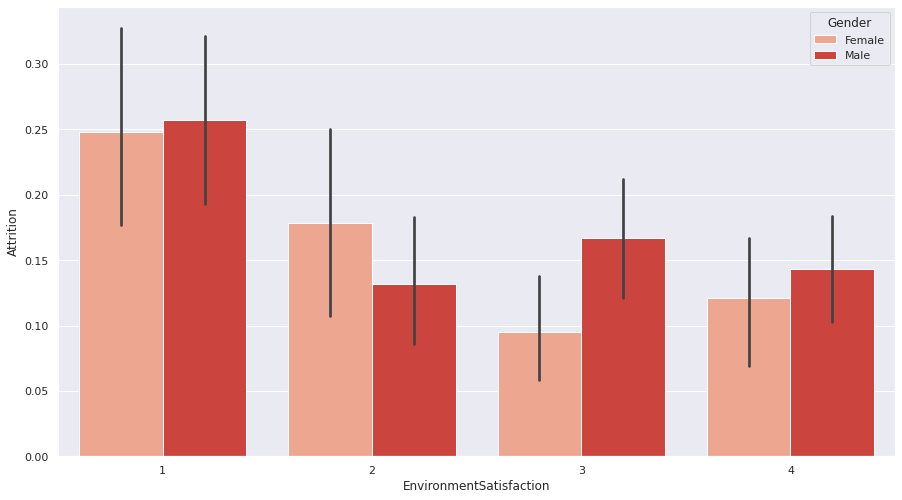

In [ ]:
#Job Satisfaction and Attrition Genderwise
sb.barplot(x = 'EnvironmentSatisfaction', y = 'Attrition', hue = 'Gender', data = emp_df, palette="Reds" )
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

In [ ]:
fig=go.Figure()
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Environment Satisfaction', 'Job Satisfaction','Relationship Satisfaction'))
fig.add_trace(go.Pie(values=emp_df.groupby(['EnvironmentSatisfaction'],as_index=False)['Age'].count()['Age'],labels=emp_df.groupby(['EnvironmentSatisfaction'],as_index=False)['Age'].count()['EnvironmentSatisfaction'],hole=0.7,marker_colors=['DeepSkyBlue','LightSalmon','LightCoral','PaleGreen'],name='Environment Satisfaction',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=emp_df.groupby(['JobSatisfaction'],as_index=False)['Age'].count()['Age'],labels=emp_df.groupby(['JobSatisfaction'],as_index=False)['Age'].count()['JobSatisfaction'],hole=0.7,marker_colors=['DeepSkyBlue','LightSalmon','LightCoral','PaleGreen'],name='Environment Satisfaction',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=emp_df.groupby(['RelationshipSatisfaction'],as_index=False)['Age'].count()['Age'],labels=emp_df.groupby(['RelationshipSatisfaction'],as_index=False)['Age'].count()['RelationshipSatisfaction'],hole=0.7,marker_colors=['DeepSkyBlue','LightSalmon','LightCoral','PaleGreen'],name='Relationship Satisfaction',showlegend=True),row=1,col=3)
fig.update_traces(textposition='outside', textinfo='percent')

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Satisfaction",title_text='<b style="color:black; font-size:100%;">Employee Satisfaction Analysis',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# **Is Salary a reason of Attrition?**

Salary related features are Monthly Income, Monthly Rate, Daily Rate, Hourly Rate, Percent Salary Hike

## 1.1 **Monthly Income Distribution**

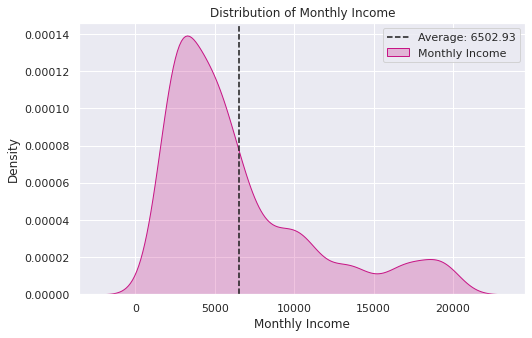

In [ ]:
#Monthly Income Distribution
plt.figure(figsize=(8,5))
sb.kdeplot(x=emp_df['MonthlyIncome'],color='MediumVioletRed',shade=True,label='Monthly Income')
plt.axvline(x=emp_df['MonthlyIncome'].mean(),color='k',linestyle ="--",label='Average: 6502.93')
plt.xlabel('Monthly Income')
plt.legend()
plt.title('Distribution of Monthly Income')
plt.show()

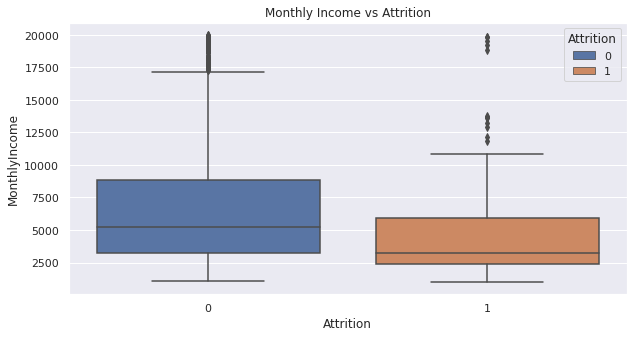

In [ ]:
#Monthly Income and Attrition
plt.figure(figsize=(10,5))
sb.boxplot(y='MonthlyIncome' , x='Attrition' , data=emp_df,hue='Attrition',dodge=False )
plt.title("Monthly Income vs Attrition");

People with lower income have left the organization

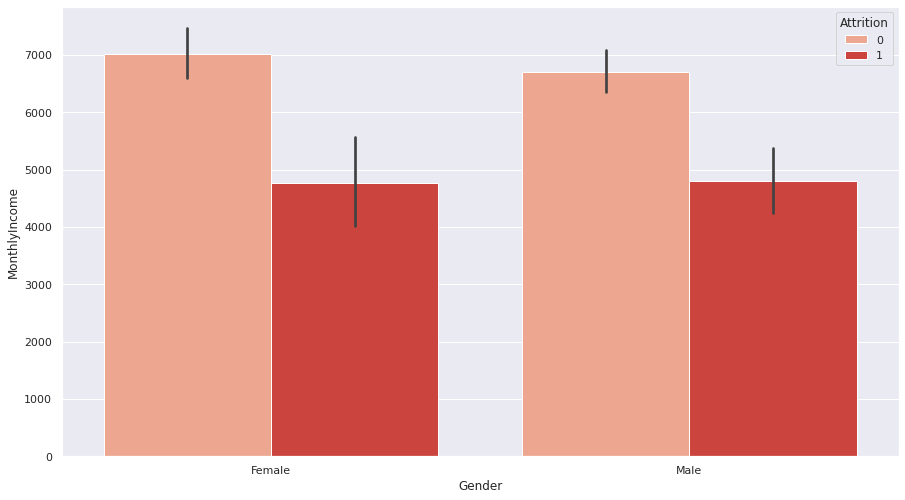

In [ ]:
#Monthly Income and Attrition, Gender wise
sb.barplot(x = 'Gender', y = 'MonthlyIncome', hue = 'Attrition', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

Monthly Income hasn't affected the attrition Genderwise. Attrition in both genders are equal. And the attrition is in people drawing salary less than 50000.

Does income across department affect attrition?

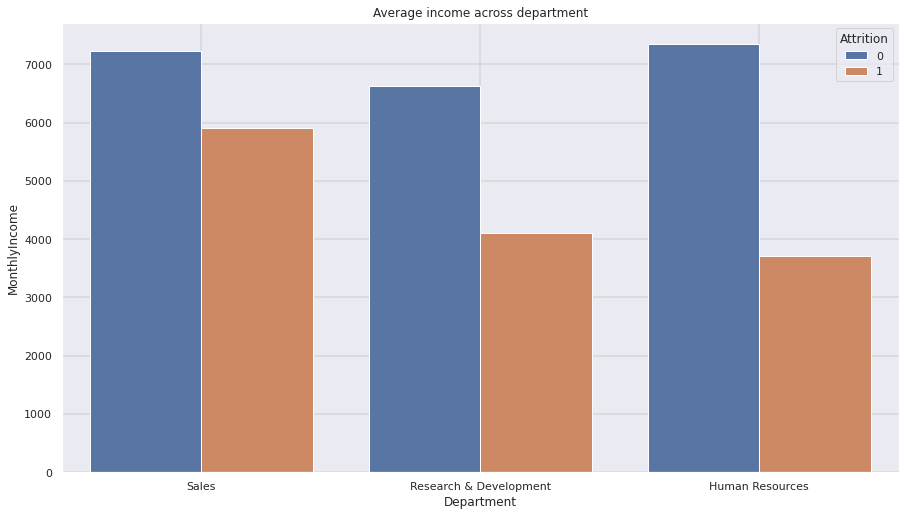

In [ ]:
color = ['red', 'orange', 'blue', 'purple']
bplot = sb.barplot(data=emp_df,
            x="Department",
            y="MonthlyIncome",
            hue="Attrition",
            ci=None,
            #palette=color # define colors of your selection
            )
sb.set(rc={'figure.figsize':(25,8.27)})
plt.title("Average income across department")
#plt.ylabel("Fare (pounds)")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

attrited employess of the same departments have lesser monthly income than employees who haven't attrited.

# 1.2 **Daily Rate and Attrition**

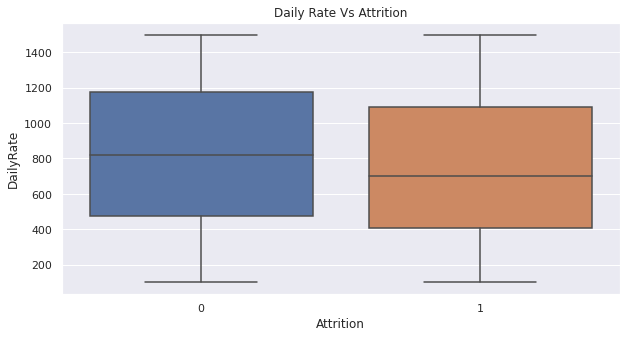

In [ ]:
#Checking How Attrition is effected by Daily Rates
plt.figure(figsize=(10 , 5))
plt.title("Daily Rate Vs Attrition")
sb.boxplot(y = 'DailyRate' , x='Attrition' , data=emp_df)


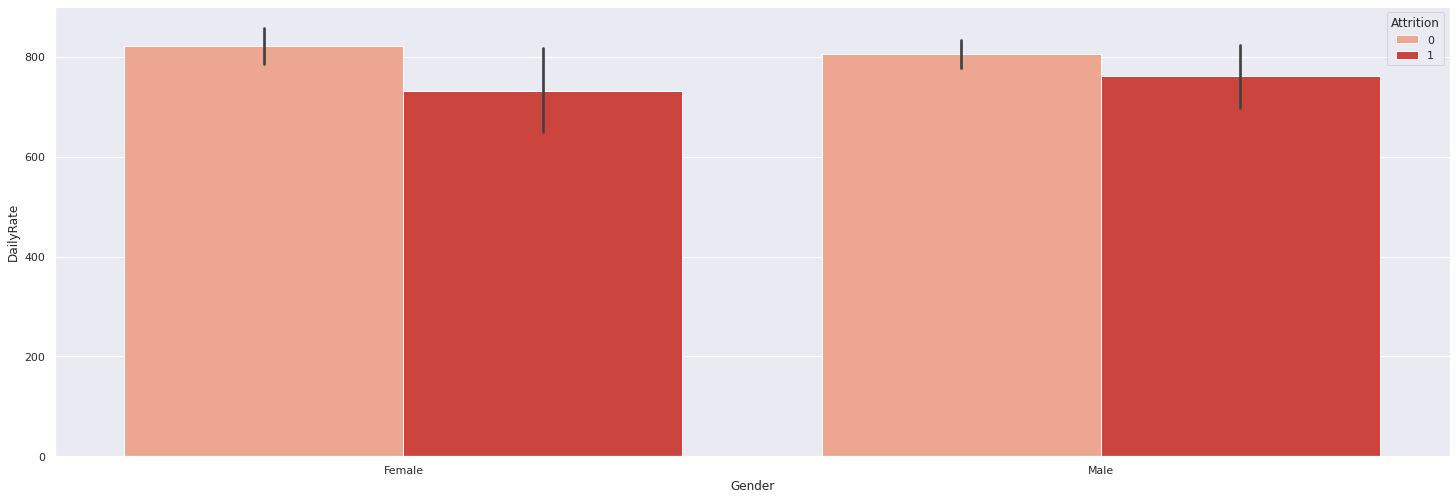

In [ ]:
#Daily Rate and Attrition, Gender wise
sb.barplot(x = 'Gender', y = 'DailyRate', hue = 'Attrition', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

Here we can see that people less daily rate have higher chances of Attrition. Male with slight higher daily rate also has left the organization

## 1.3 **Monthly Rate and Attrition**

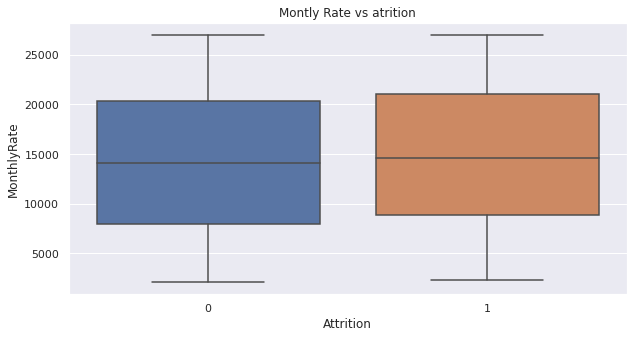

In [ ]:
#Checking How Attrition is effected by Monthly Rates
plt.figure(figsize=(10 , 5))
sb.boxplot(y = 'MonthlyRate' , x='Attrition' , data=emp_df)
plt.title("Montly Rate vs atrition");


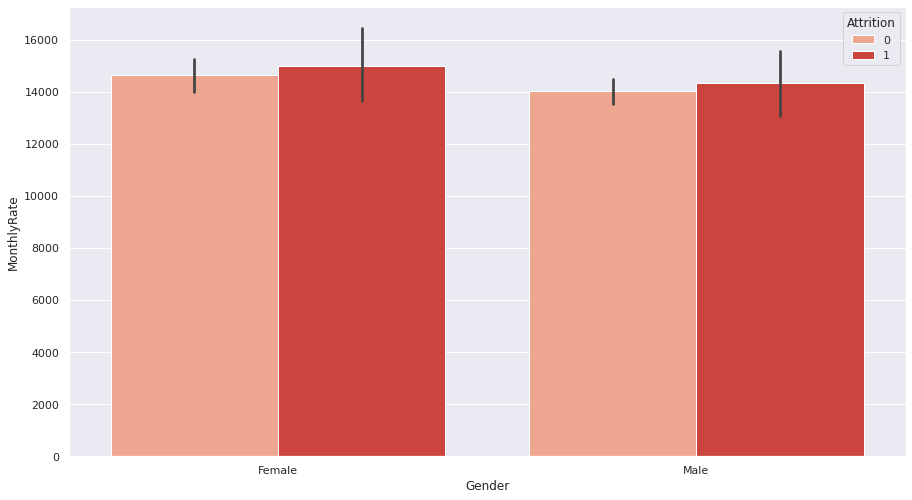

In [ ]:
#Monthly Rate and Attrition, Gender wise
sb.barplot(x = 'Gender', y = 'MonthlyRate', hue = 'Attrition', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

Here we can see that there is no evident relation between mothly rates and Attrition. Females with slightly higher monthly rate have left the organization.

## 1.4 **Hourly Rate and Attrition**

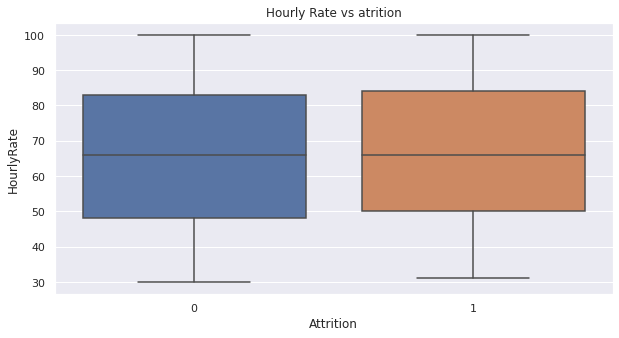

In [ ]:
#Checking How Attrition is effected by Hourly rates
plt.figure(figsize=(10 , 5))
sb.boxplot(y = 'HourlyRate' , x='Attrition' , data=emp_df)
plt.title("Hourly Rate vs atrition");


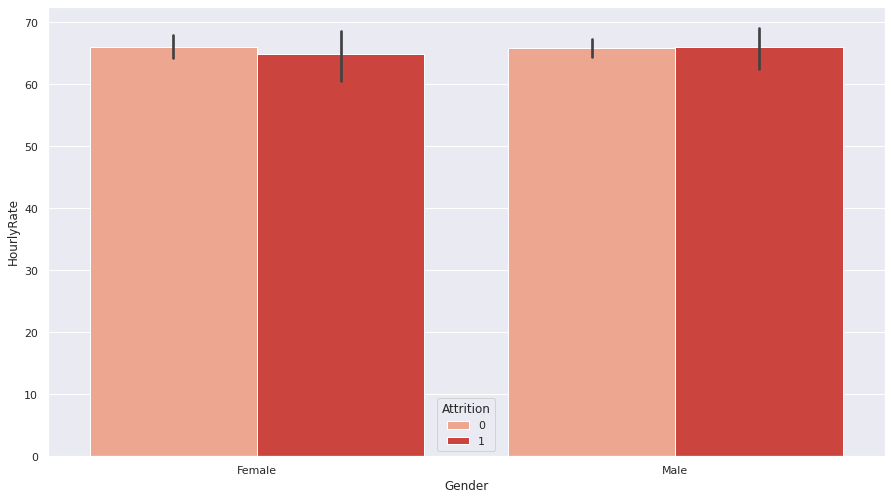

In [ ]:
#Monthly Rate and Attrition, Gender wise
sb.barplot(x = 'Gender', y = 'HourlyRate', hue = 'Attrition', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

Here we can see that ther is no evident relation between hourly rates and Attrition. Female with slight lower hourly rate have left the organisation

## **1.5 PercentSalaryHike and Attrition**

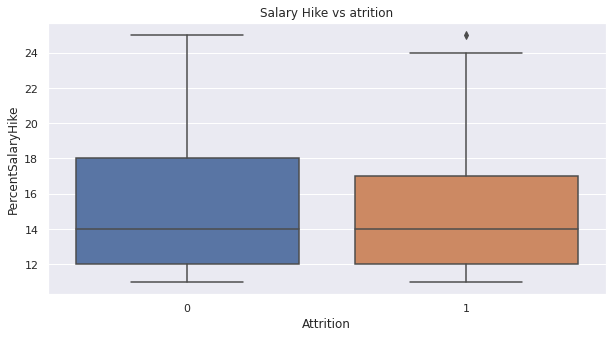

In [ ]:
#Checking How Attrition is effected by Hourly rates
plt.figure(figsize=(10 , 5))
sb.boxplot(y = 'PercentSalaryHike' , x='Attrition' , data=emp_df)
plt.title("Salary Hike vs atrition");


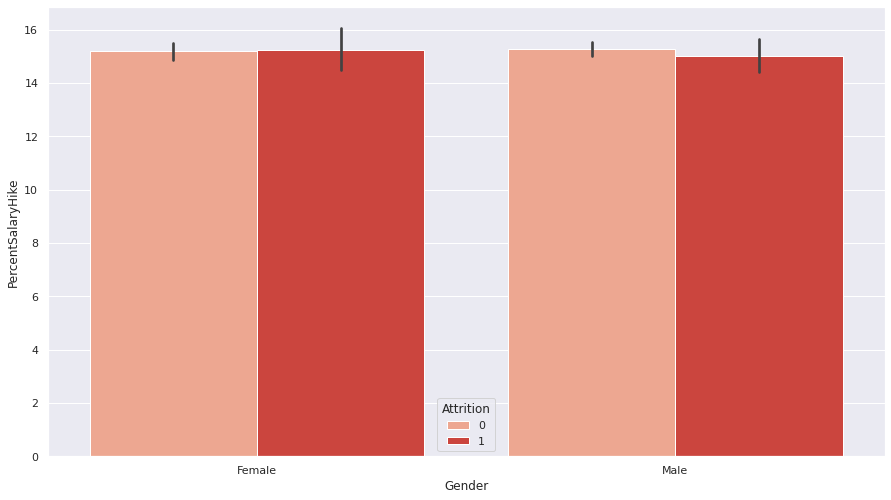

In [ ]:
#Percent Salary Hike and Attrition, Gender wise
sb.barplot(x = 'Gender', y = 'PercentSalaryHike', hue = 'Attrition', data = emp_df, palette="Reds")
sb.set(rc={'figure.figsize':(15,8.27)})
# Show the plot
plt.show()

Employees who got less salary hike have left the organisation. It doesnt have much influence gender wise.

# **Attrition in Job Roles and monthly income**

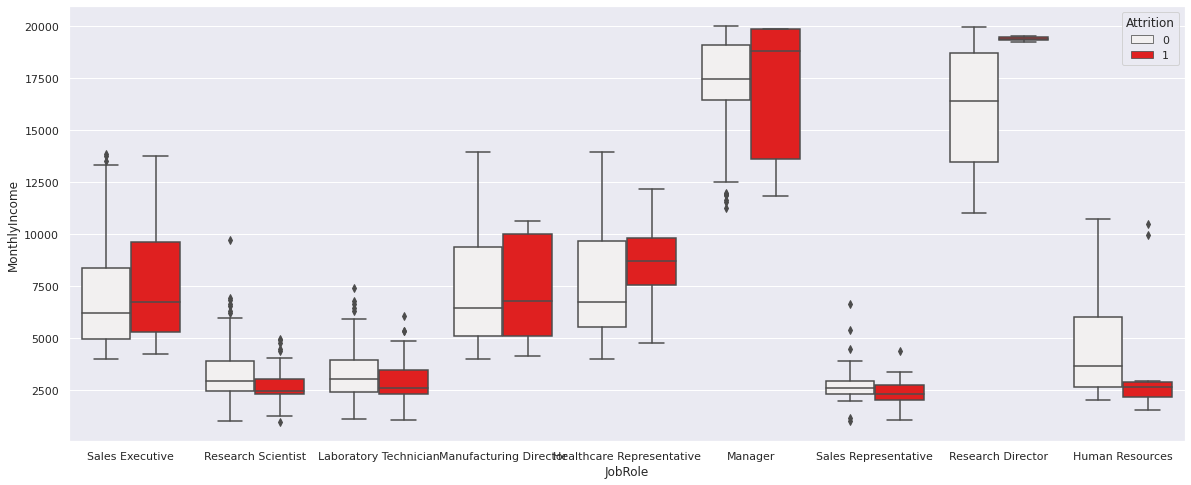

In [ ]:
plt.figure(figsize =(20 ,8))
sb.boxplot(x ='JobRole', y = 'MonthlyIncome' ,data = emp_df ,hue ='Attrition' ,color ='red')

# **Attrition in different Job Levels based on monthly income**

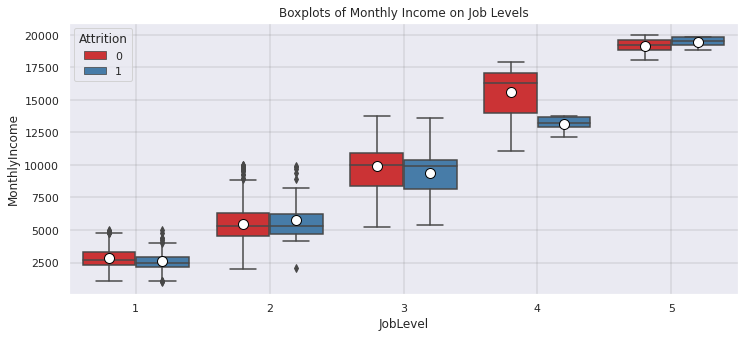

In [ ]:
#Monthly Income comparson on Job Levels
plt.figure(figsize = (12,5))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

#Draw a boxplot with nested grouping by two categorical variables:
sb.boxplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data = emp_df,
           showmeans = True,  #line is the median, not the mean, mean is depicted in white circle
           meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"},
           #palette="Set1"
           )
#place legend in center right of plot
plt.legend(loc='upper left', title='Attrition')
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Boxplots of Monthly Income on Job Levels"); #Add your title here

# Monthly income in Job Levels comparison by Gender

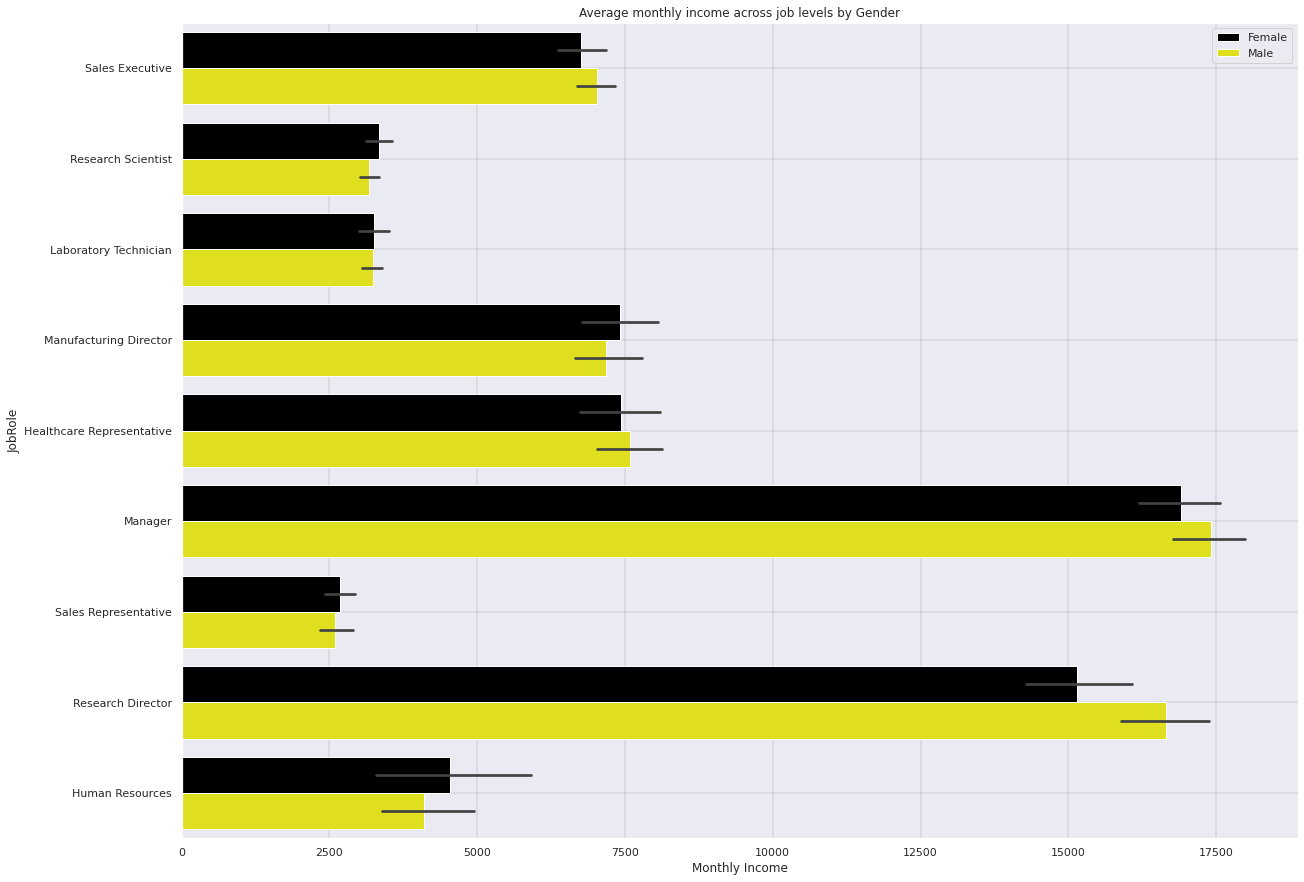

In [ ]:
#Average monthly income across job levels by Gender
#A grouped bar plot

#define graph size
plt.figure(figsize = (20,15))
color = ['black','yellow','green']

bplot = sb.barplot(data=emp_df,
            x="MonthlyIncome",
            y="JobRole",
            hue="Gender",
            palette=color
            )

#format the percentage values
vals = bplot.get_xticks()
#print(vals)
#bplot.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.title("Average monthly income across job levels by Gender")
plt.xlabel("Monthly Income")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# add legend and set position to upper right
plt.legend(loc='upper right');

# **Employee Attrition by Time Dimensions**

# Does promotion affect attrition

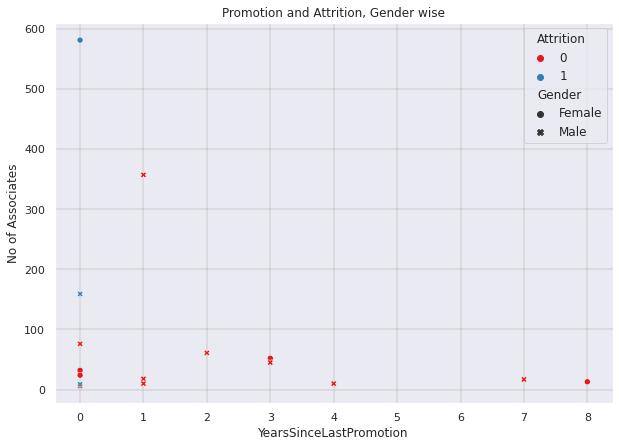

In [ ]:
plt.figure(figsize=(10, 7))

sb.scatterplot(x="YearsSinceLastPromotion", y=emp_df['YearsSinceLastPromotion'].value_counts(), hue="Attrition", style="Gender",data=emp_df);
plt.title("Promotion and Attrition, Gender wise")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("No of Associates");

Employees who got promotion in less than one year left the company irrespective of Gender.

# Number of Companies Worked and Attrition

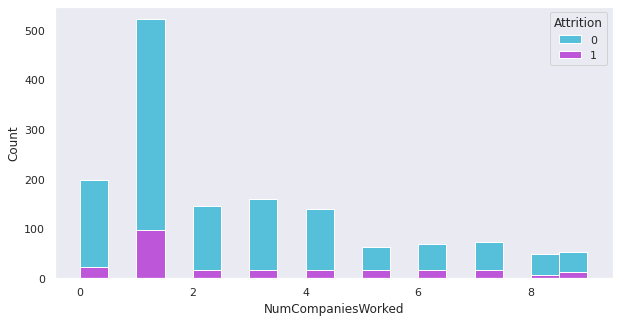

In [ ]:
#Number of Companies worked and attrition
plt.figure(figsize=(10,5))
sb.histplot(x='NumCompaniesWorked' , hue='Attrition' , data=emp_df  ,multiple='stack' , palette=('#24b1d1', '#ae24d1'), edgecolor='white')
plt.grid()

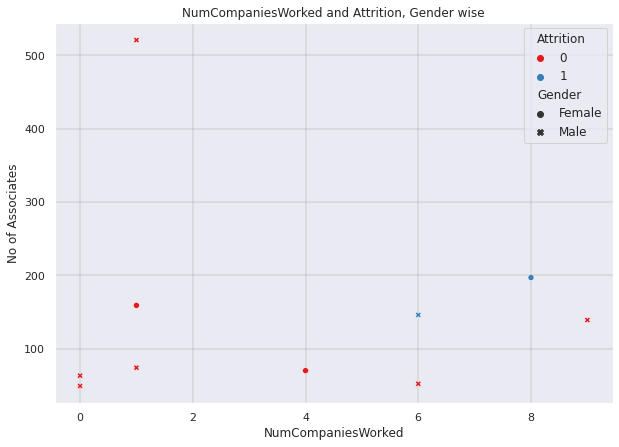

In [ ]:
plt.figure(figsize=(10, 7))

sb.scatterplot(x="NumCompaniesWorked", y=emp_df['NumCompaniesWorked'].value_counts(), hue="Attrition", style="Gender",data=emp_df);
plt.title("NumCompaniesWorked and Attrition, Gender wise")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.xlabel("NumCompaniesWorked")
plt.ylabel("No of Associates");

with the increase in years at company and increase in the years since the last promotion Attrition rate decreases

At starting years with the current manager, Employee attrition is more and with increase in the years with the manager attrition decreases

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass t

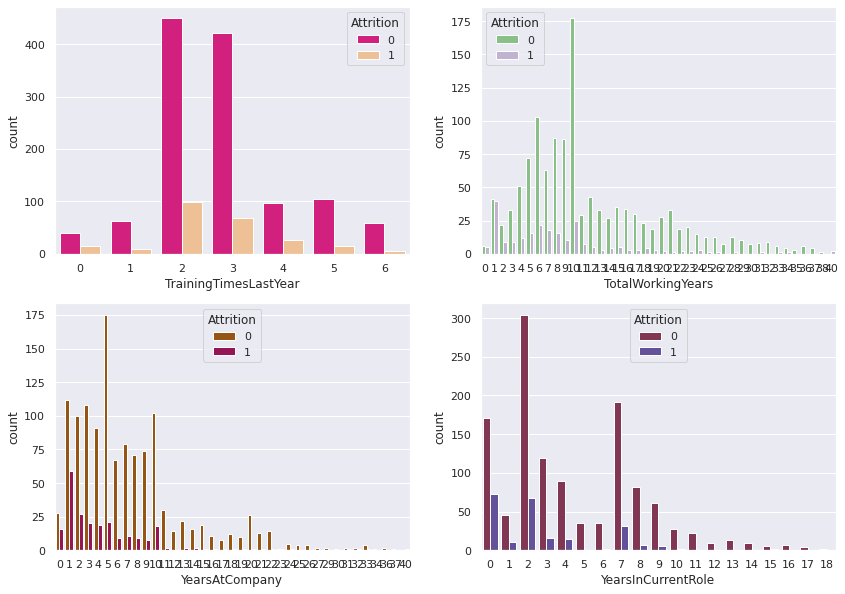

In [ ]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sb.countplot(emp_df['TrainingTimesLastYear'] ,hue =emp_df['Attrition'] ,palette='Accent_r')
plt.subplot(2,2,2)
sb.countplot(emp_df['TotalWorkingYears'] ,hue =emp_df['Attrition'] ,palette='Accent')
plt.subplot(2,2,3)
sb.countplot(emp_df['YearsAtCompany'] ,hue =emp_df['Attrition'] ,palette='brg_r')
plt.subplot(2,2,4)
sb.countplot(emp_df['YearsInCurrentRole'] ,hue =emp_df['Attrition'] ,palette='twilight_r')

Years with Current Manager and Attrition

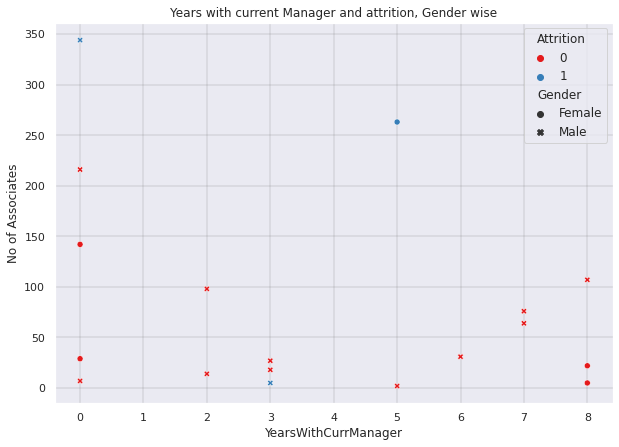

In [ ]:
plt.figure(figsize=(10, 7))

sb.scatterplot(x="YearsWithCurrManager", y=emp_df['YearsWithCurrManager'].value_counts(), hue="Attrition", style="Gender",data=emp_df);
plt.title("Years with current Manager and attrition, Gender wise")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.xlabel("YearsWithCurrManager")
plt.ylabel("No of Associates");

Feature Engineering and Models

In [ ]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'age_group'],
      dtype='object')

Binary Features Encoding

In [ ]:
y_n_type = []
others =[]
for col in emp_df.select_dtypes('object').columns:
    if(len(emp_df[col].unique()) ==2):
        y_n_type.append(col)

y_n_type

['Gender', 'OverTime']

In [ ]:
emp_df['Gender'].replace({'Male':1 ,'Female':0} ,inplace = True)
emp_df['OverTime'].replace({'Yes':1 ,'No':0} ,inplace = True)

In [ ]:
#Categorical Features Encoding
others = emp_df.select_dtypes('object').columns
others

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [ ]:
le = LabelEncoder()
for col in others:
    emp_df[col] = le.fit_transform(emp_df[col])

In [ ]:
emp_df.drop('age_group',axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


SPLITTING DATASET INTO FEATURES -> X AND TARGET -> Y

In [ ]:
x = emp_df.drop('Attrition' ,axis =1)
y = emp_df['Attrition']

print(x.shape ,y.shape)

(1470, 31) (1470,)


In [ ]:
#imbalanced data handling

In [ ]:
x=x.drop('age_group',axis=1)

In [ ]:

smote = SMOTE(sampling_strategy='minority')
x ,y = smote.fit_resample(x ,y)

print(x.shape ,y.shape)

(2466, 30) (2466,)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Now Class is Balanced')

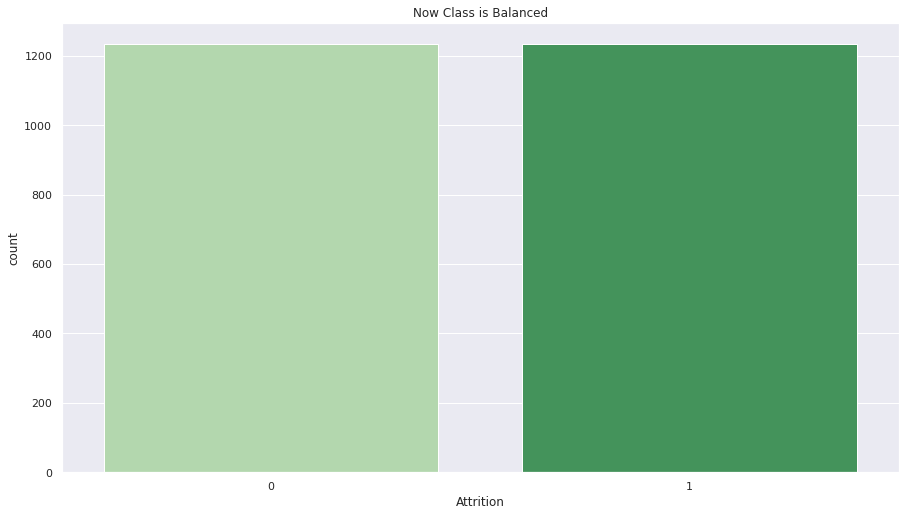

In [ ]:
#now balanced
y.value_counts()
sb.countplot(y ,palette='Greens')
plt.title('Now Class is Balanced')

SPLITTING DATA INTO TRAINING AND TESTING SETS

In [ ]:
X_train , X_test , y_train ,y_test = train_test_split(x , y, test_size=0.2 , random_state= 52)
print(X_train.shape)

(1972, 30)


In [ ]:
#scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)


x_train

array([[ 1.49623309, -0.81366525, -0.58926725, ..., -0.18335397,
        -0.31697406, -0.13992898],
       [ 0.70854377, -2.3609631 , -1.11082098, ..., -0.18335397,
         0.35048226, -0.13992898],
       [ 0.93359786,  0.7336326 ,  1.84819815, ..., -0.47875758,
        -0.31697406, -0.13992898],
       ...,
       [-0.64178077, -0.81366525, -0.17947503, ..., -1.0695648 ,
        -0.65070223, -1.05464703],
       [-0.07914554,  0.7336326 , -0.29389754, ...,  1.2936641 ,
        -0.65070223,  0.77478907],
       [ 0.0333815 ,  0.7336326 , -0.0943234 , ...,  0.11204965,
        -0.65070223, -0.74974101]])

In [ ]:
print(len(x_train))
print(len(x_test))

1972
494


In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=6)

# fit the model with data
logreg.fit(x_train, y_train)

y_predlog = logreg.predict(x_test)

#model accuracy
logreg.score(x_test,y_test)

0.8238866396761133

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, y_predlog)
cm

array([[195,  36],
       [ 51, 212]])

Text(39.5, 0.5, 'Truth')

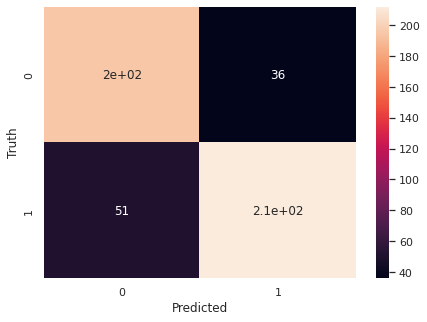

In [ ]:
#Visualizing confusion matrix - Heatmap
plt.figure(figsize=(7,5))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_score = cross_val_score(rf_model , x_train , y_train ,cv = 3 ,scoring = 'neg_mean_squared_error')
rf_score.mean()

-0.09736313321273975

In [ ]:
#SVM
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=2, C=2)
svm.fit(x_train, y_train)

# Model Accuracy

y_predsvm = svm.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_predsvm))

Accuracy: 0.828


In [ ]:
#Decision Tree Classifier
treemodel = DecisionTreeClassifier()
treemodel.fit(x_train,y_train)
treemodel.score(x_test,y_test)

0.8076923076923077

In [ ]:
print("Classification Report of Models")
print("Logistic Regression")
print(classification_report(y_test, logreg.predict(x_test)))
print("Random Forest Classifier")
print(classification_report(y_test, rf_model.predict(x_test)))
print("Support Vector Machine")
print(classification_report(y_test,svm.predict(x_test)))
print("Decision Tree Classifier")
print(classification_report(y_test, treemodel.predict(x_test)))

Classification Report of Models
Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       231
           1       0.85      0.81      0.83       263

    accuracy                           0.82       494
   macro avg       0.82      0.83      0.82       494
weighted avg       0.83      0.82      0.82       494

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       231
           1       0.93      0.87      0.90       263

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494

Support Vector Machine
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       231
           1       0.87      0.80      0.83       263

    accuracy                           0.83       494
   macro avg       0.83     

Determining Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svm, x_test, y_test)

In [ ]:
perm_importance

{'importances_mean': array([ 5.66801619e-03,  3.23886640e-03, -4.44089210e-17,  2.02429150e-03,
         4.04858300e-04,  1.61943320e-03,  2.42914980e-03,  3.64372470e-03,
        -4.04858300e-04, -2.42914980e-03,  2.79352227e-02,  5.87044534e-02,
         7.69230769e-03,  1.98380567e-02, -1.61943320e-03,  4.04858300e-03,
         8.09716599e-04,  8.09716599e-04,  4.04858300e-03,  8.09716599e-04,
         1.13360324e-02,  3.23886640e-03,  4.85829960e-02,  4.04858300e-03,
         1.17408907e-02,  1.61943320e-02,  2.71255061e-02,  2.67206478e-02,
         4.04858300e-03,  2.91497976e-02]),
 'importances_std': array([0.00348272, 0.0009917 , 0.00362116, 0.00181058, 0.00534045,
        0.00348272, 0.00323887, 0.00502416, 0.00803621, 0.00268553,
        0.0048583 , 0.01787806, 0.00348272, 0.01066554, 0.01003199,
        0.0051211 , 0.0009917 , 0.00416827, 0.004435  , 0.0009917 ,
        0.00489192, 0.00763885, 0.01227996, 0.0022175 , 0.01162162,
        0.00829713, 0.00521623, 0.0139896 , 0

In [ ]:
perm_importance.importances_mean

array([ 5.66801619e-03,  3.23886640e-03, -4.44089210e-17,  2.02429150e-03,
        4.04858300e-04,  1.61943320e-03,  2.42914980e-03,  3.64372470e-03,
       -4.04858300e-04, -2.42914980e-03,  2.79352227e-02,  5.87044534e-02,
        7.69230769e-03,  1.98380567e-02, -1.61943320e-03,  4.04858300e-03,
        8.09716599e-04,  8.09716599e-04,  4.04858300e-03,  8.09716599e-04,
        1.13360324e-02,  3.23886640e-03,  4.85829960e-02,  4.04858300e-03,
        1.17408907e-02,  1.61943320e-02,  2.71255061e-02,  2.67206478e-02,
        4.04858300e-03,  2.91497976e-02])

In [ ]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'age_group'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'FEATURE IMPORTANCE')

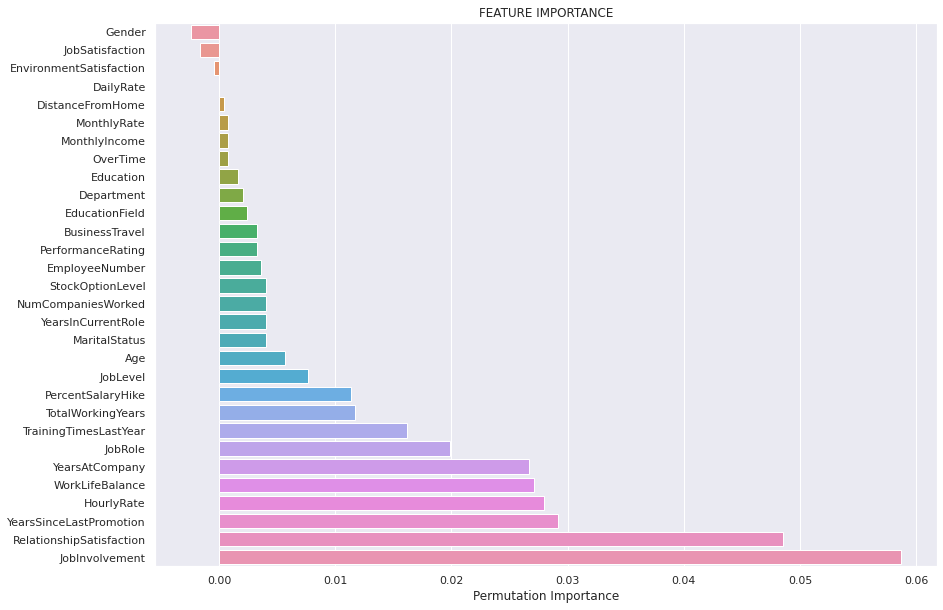

In [ ]:
cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

features = np.array(cols)
plt.figure(figsize = (14 ,10))
sorted_idx = perm_importance.importances_mean.argsort()
sb.barplot( perm_importance.importances_mean[sorted_idx] ,features[sorted_idx] )
plt.xlabel("Permutation Importance")

plt.title('FEATURE IMPORTANCE')